해당 노트북은 YouTube [todaycode오늘코드](https://www.youtube.com/channel/UCLR3sD0KB_dWpvcsrLP0aUg) 강의를 기반으로 작성했습니다.

<font color='red'>**EDA 과정: 기본적으로 ID와 같은 식별자를 제외한 모든 칼럼을 차례대로 분석함**</font>
* 1) 날짜
* 2) ..

# 서울시에서 공개한 코로나19 발생동향 분석
* https://www.seoul.go.kr/coronaV/coronaStatus.do
* 해당 웹사이트 테이블 구조가 자주 바뀌는 점 염두


In [1]:
# 필요한 모듈 
import pandas as pd
import numpy as np

In [2]:
# 강의 설명 파일로 일단 진행! (2020년7월1일 기준 데이터!)
file_name = f'data/seoul-covid19_6_30_.csv'
# 최신 파일로는 추후에 진행해보자~
#file_name = f'data/seoul-covid19-2021_01_27.csv'

file_name

'data/seoul-covid19_6_30_.csv'

In [3]:
df = pd.read_csv(file_name)
df.shape

(1321, 7)

In [4]:
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,1321,12830,6.30.,영등포구,-,영등포구 확진자 접촉,-
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원
3,1318,12808,6.30.,관악구,-,강남구 역삼동 모임,보라매병원
4,1317,12809,6.30.,관악구,-,강남구 역삼동 모임,보라매병원


In [5]:
# 연번 기준으로 역순으로 정렬
df = df.sort_values(by="연번", ascending=False)
df

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,1321,12830,6.30.,영등포구,-,영등포구 확진자 접촉,-
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원
3,1318,12808,6.30.,관악구,-,강남구 역삼동 모임,보라매병원
4,1317,12809,6.30.,관악구,-,강남구 역삼동 모임,보라매병원
...,...,...,...,...,...,...,...
1316,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원)
1317,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
1318,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원)
1319,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)


서울시 코로나 최초 발생은 1월24일 중국 우한시 여행자 

# 시각화 도구 불러오기

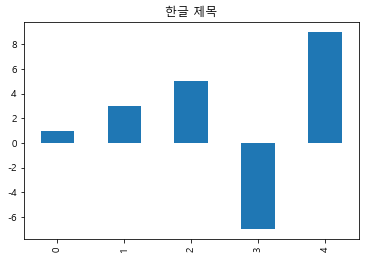

In [6]:
# matplotlib.pyplot을 이용한 한글폰트 설정
# plt.style.use로 "fivethirtyeight" 스타일 지정
import matplotlib.pyplot as plt
# 한글 설정 -> plt.rc 사용
plt.rc("font", family="Malgun Gothic") # Windows
#plt.rc("font", family="AppleGothic") # Mac

# 마이너스(-) 기호 표시 -> plt.rc 사용
plt.rc("axes", unicode_minus=False) 

# matplotlib 폰트 컬러 설정 -> plt.rcParams 사용 => 더 좋은 방법 없을까?
# plt.rcParams.update({"text.color": 'red',
#                     "axes.labelcolor": 'white',
#                     "xtick.color": 'white',
#                      "ytick.color": "white",})


pd.Series([1,3,5,-7,9]).plot.bar(title="한글 제목")


## 시각화 선명하게 설정하기

In [7]:
# retina를 지원한다면, 시각화 폰트를 좀 더 선명하게 볼 수 있음!
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

# 확진일

In [8]:
# 확진일 빈도수 체크
df["확진일"].value_counts()

3.10.    46
6.12.    30
6.06.    29
6.05.    27
3.9.     26
         ..
2.7.      1
4.19.     1
5.17.     1
2.6.      1
3.5.      1
Name: 확진일, Length: 131, dtype: int64

In [9]:
# 확진일 형태를 '2020-03-10' 와 같이 연-월-일로 변경
df["확진일자"] = pd.to_datetime("2020-" + df["확진일"].str.replace('.', '-'))
df[["확진일", "확진일자"]]

,확진일,확진일자
0,6.30.,2020-06-30
1,6.30.,2020-06-30
2,6.30.,2020-06-30
3,6.30.,2020-06-30
4,6.30.,2020-06-30
...,...,...
1316,1.31.,2020-01-31
1317,1.30.,2020-01-30
1318,1.30.,2020-01-30
1319,1.30.,2020-01-30


In [10]:
# 월만 추출하여 새로운 칼럼 생성
df["월"] = df["확진일자"].dt.month
df[["확진일", "확진일자", "월"]]

,확진일,확진일자,월
0,6.30.,2020-06-30,6
1,6.30.,2020-06-30,6
2,6.30.,2020-06-30,6
3,6.30.,2020-06-30,6
4,6.30.,2020-06-30,6
...,...,...,...
1316,1.31.,2020-01-31,1
1317,1.30.,2020-01-30,1
1318,1.30.,2020-01-30,1
1319,1.30.,2020-01-30,1


In [11]:
# 몇 번째 '주'인지 추출하여 새로운 칼럼 생성
df["주"] = df["확진일자"].dt.week
df[["확진일", "확진일자", "월", "주"]]

<ipython-input-11-801d439b830e>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["주"] = df["확진일자"].dt.week


,확진일,확진일자,월,주
0,6.30.,2020-06-30,6,27
1,6.30.,2020-06-30,6,27
2,6.30.,2020-06-30,6,27
3,6.30.,2020-06-30,6,27
4,6.30.,2020-06-30,6,27
...,...,...,...,...
1316,1.31.,2020-01-31,1,5
1317,1.30.,2020-01-30,1,5
1318,1.30.,2020-01-30,1,5
1319,1.30.,2020-01-30,1,5


2020-01-24을 4주차로 기준을 잡고 한 주씩 증가

## 선그래프 그리기

In [12]:
df["확진일자"].value_counts().sort_index() # sort_index(): 시간 흐름에 따라 파악하기 위함

2020-01-24     1
2020-01-30     3
2020-01-31     3
2020-02-02     1
2020-02-05     2
              ..
2020-06-26    17
2020-06-27    14
2020-06-28     7
2020-06-29     8
2020-06-30     8
Name: 확진일자, Length: 130, dtype: int64

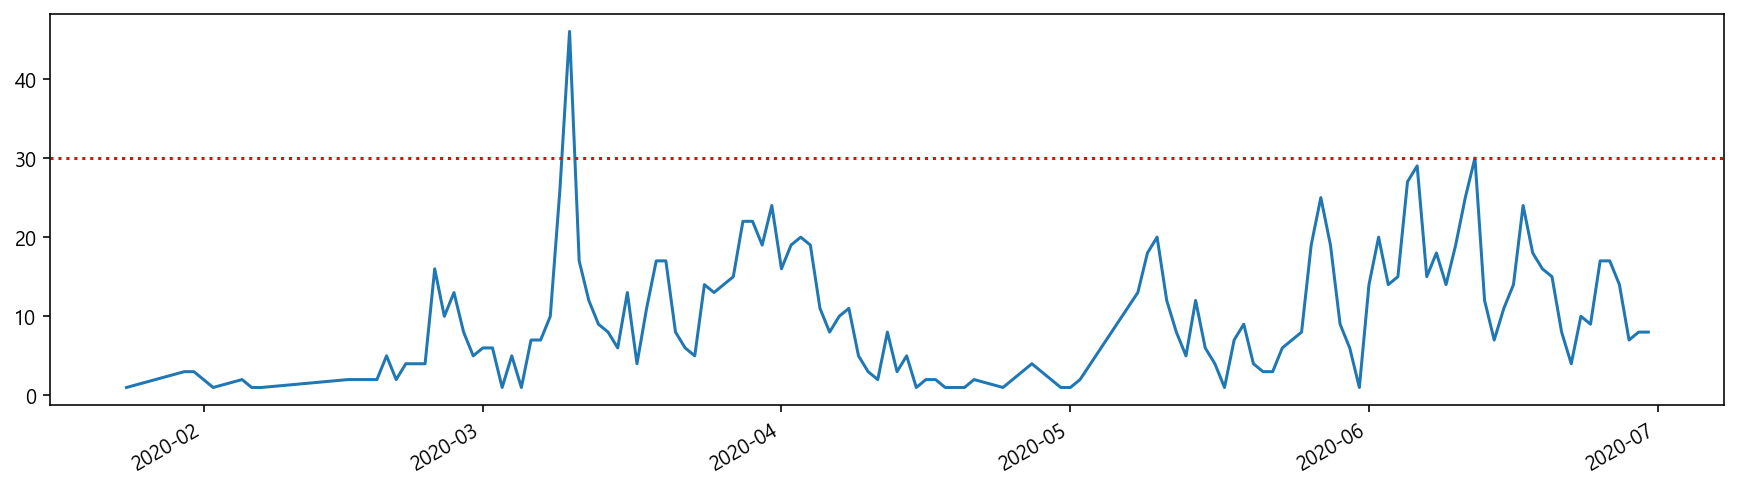

In [13]:
# df.plot()은 기본적으로 '선그래프'를 그린다!
df["확진일자"].value_counts().sort_index().plot(figsize=(15,4))
plt.axhline(30, color='red', linestyle=":") # plt.axhline(): x축과 평행한 라인 출력

3월 이후로 폭등 후 감소 / 4월 이후로 다소 증가 후 감소 / 5월 이후로 다시 증가 / 6월 이후로 산발적인 증가 및 감소

## 선그래프에 값 표시하기
* 선그래프에 일자별로 20명이 넘어가는 확진자수를 표시해보자!

In [14]:
# 데이터가 모두 2020년이므로, '월-일'로만 표시하기 위함
# df["확진일자"]가 timestamp 타입이기 때문에 .map()을 사용하기 전에 문자열 타입으로 변환 필요 -> astype(str)
df["월일"] = df["확진일자"].astype(str).map(lambda x: x[-5:]) # Series.map(): Series 데이터 한 개씩 함수 적용
df[["확진일자", "월", "주", "월일"]].head()

,확진일자,월,주,월일
0,2020-06-30,6,27,06-30
1,2020-06-30,6,27,06-30
2,2020-06-30,6,27,06-30
3,2020-06-30,6,27,06-30
4,2020-06-30,6,27,06-30


In [15]:
day_count = df["월일"].value_counts().sort_index()
day_count

01-24     1
01-30     3
01-31     3
02-02     1
02-05     2
         ..
06-26    17
06-27    14
06-28     7
06-29     8
06-30     8
Name: 월일, Length: 130, dtype: int64

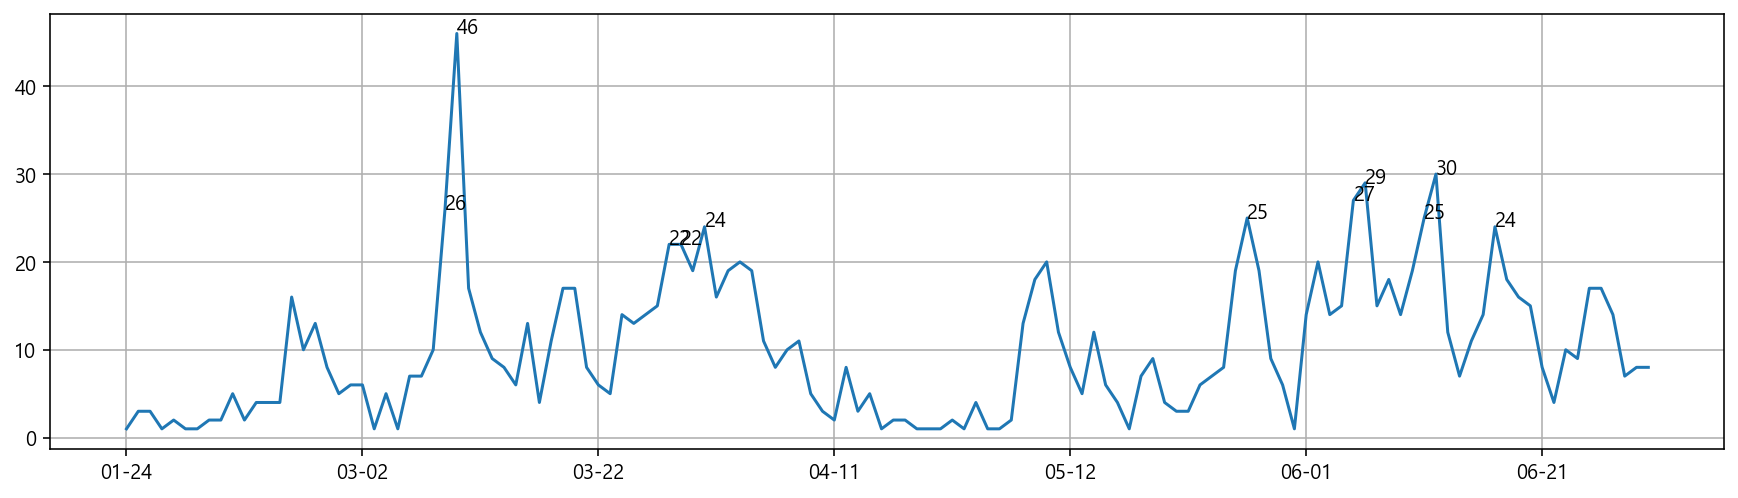

In [16]:
g = day_count.plot(figsize=(15, 4))
for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count > 20:
        g.text(x=i, y=case_count, s=case_count)
plt.grid(True)

가장 확진자가 많은 날은 3월중에 46명이 발생했다. 

## 확진자가 가장 많이 나온날

In [17]:
day_count

01-24     1
01-30     3
01-31     3
02-02     1
02-05     2
         ..
06-26    17
06-27    14
06-28     7
06-29     8
06-30     8
Name: 월일, Length: 130, dtype: int64

In [18]:
# 가장 많은 경우엔 하루에 46명도 있었음!
day_count.describe()

count    130.000000
mean      10.161538
std        7.917015
min        1.000000
25%        4.000000
50%        8.000000
75%       15.000000
max       46.000000
Name: 월일, dtype: float64

In [19]:
day_count[day_count == day_count.max()]

03-10    46
Name: 월일, dtype: int64

In [20]:
# 확진자가 가장 많았던 3월10일 데이터
df[df["월일"]=='03-10'].head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일
1119,202,7567,3.10.,노원구,-,콜센터직원 접촉,서울의료원(퇴원),2020-03-10,3,11,03-10
1120,201,7711,3.10.,노원구,-,콜센터직원 접촉,서울의료원(퇴원),2020-03-10,3,11,03-10
1121,200,7555,3.10.,구로구,-,구로구 콜센터 관련,서남병원(퇴원),2020-03-10,3,11,03-10
1122,199,7725,3.10.,양천구,-,구로구 콜센터 관련,서남병원(퇴원),2020-03-10,3,11,03-10
1123,198,7539,3.10.,양천구,-,콜센터직원 접촉,서남병원(퇴원),2020-03-10,3,11,03-10


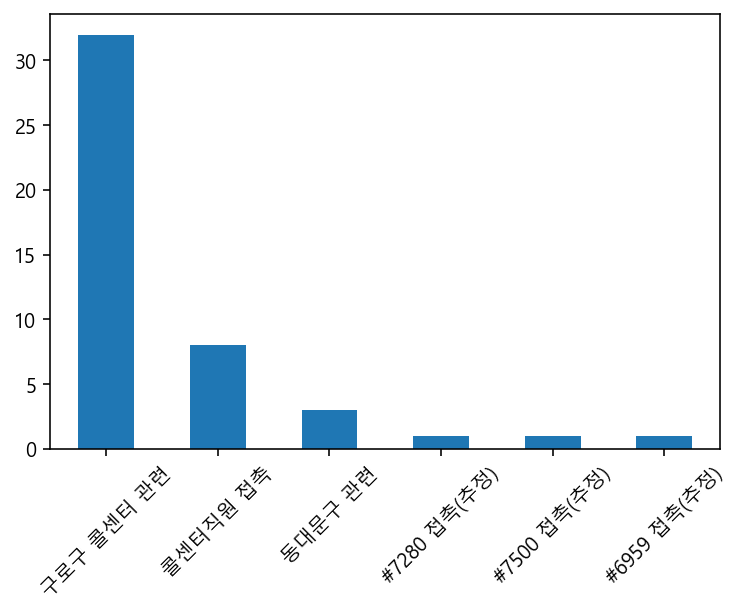

In [21]:
# test
df[df["월일"]=='03-10']["접촉력"].value_counts().plot.bar(rot=45)

3월10일에 발생한 집단 감염은 구로구 콜센터 관련된 경우가 가장 많다

## 막대그래프 그리기

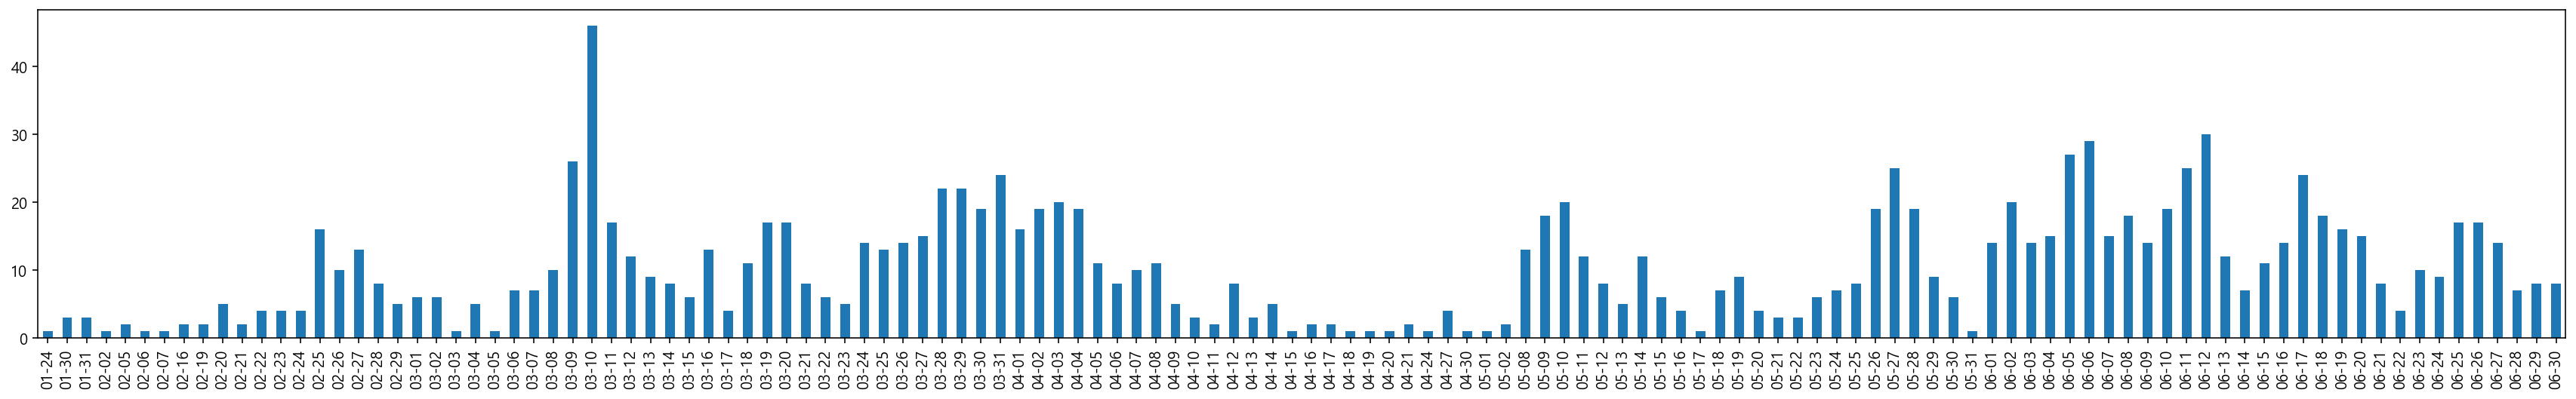

In [22]:
day_count.plot.bar(figsize=(30, 4))

3월10일이 확진자수가 가장 많은 것 확인

## 최근 데이터만 슬라이싱으로 나눠 그리기

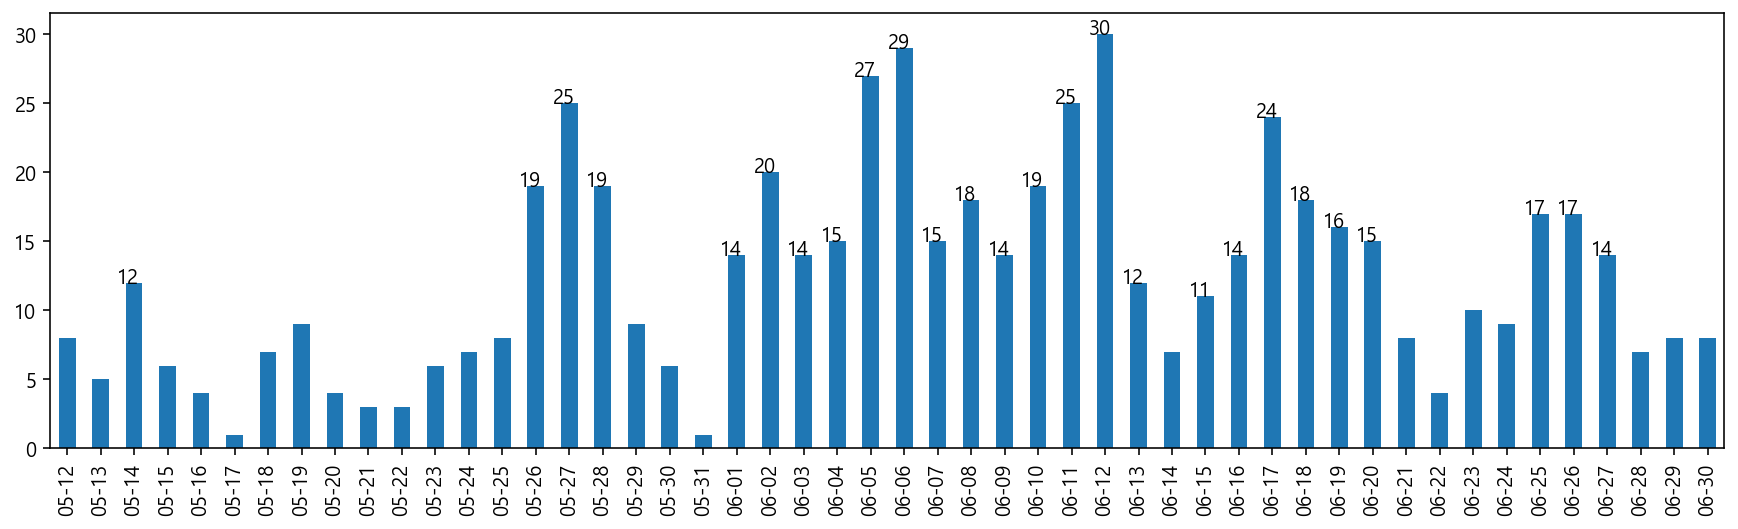

In [23]:
# 최근 50일 간의 추이만 시각화
g = day_count[-50:].plot.bar(figsize=(15,4))

for i in range(50):
    case_count = day_count[-50:].iloc[i]
    if case_count > 10:
        g.text(x=i-0.5, y=case_count, s=case_count)

최근 50일 동안에는 6월에 확진자수가 가장 많음

## 월별 확진자 수 그리기

In [24]:
df["월"].value_counts()

6    459
3    391
5    228
4    156
2     80
1      7
Name: 월, dtype: int64

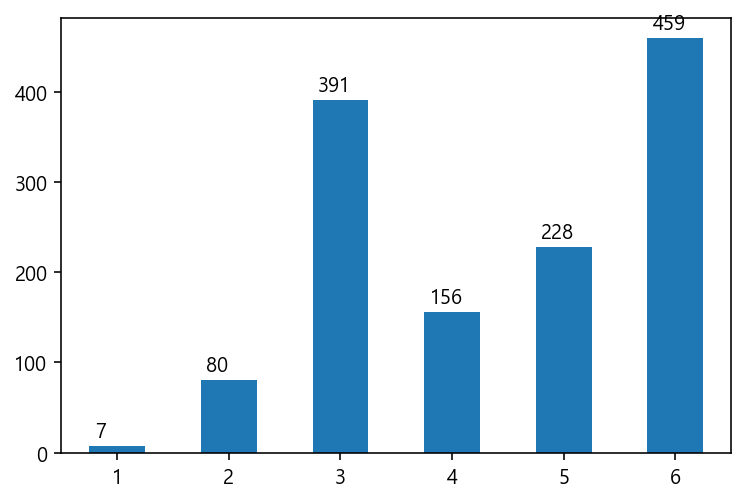

In [25]:
month_case = df["월"].value_counts().sort_index()
g = month_case.plot.bar(rot=0)

for i in range(len(month_case)):
    g.text(x=i-0.2, y=month_case.iloc[i]+10, s=month_case.iloc[i])

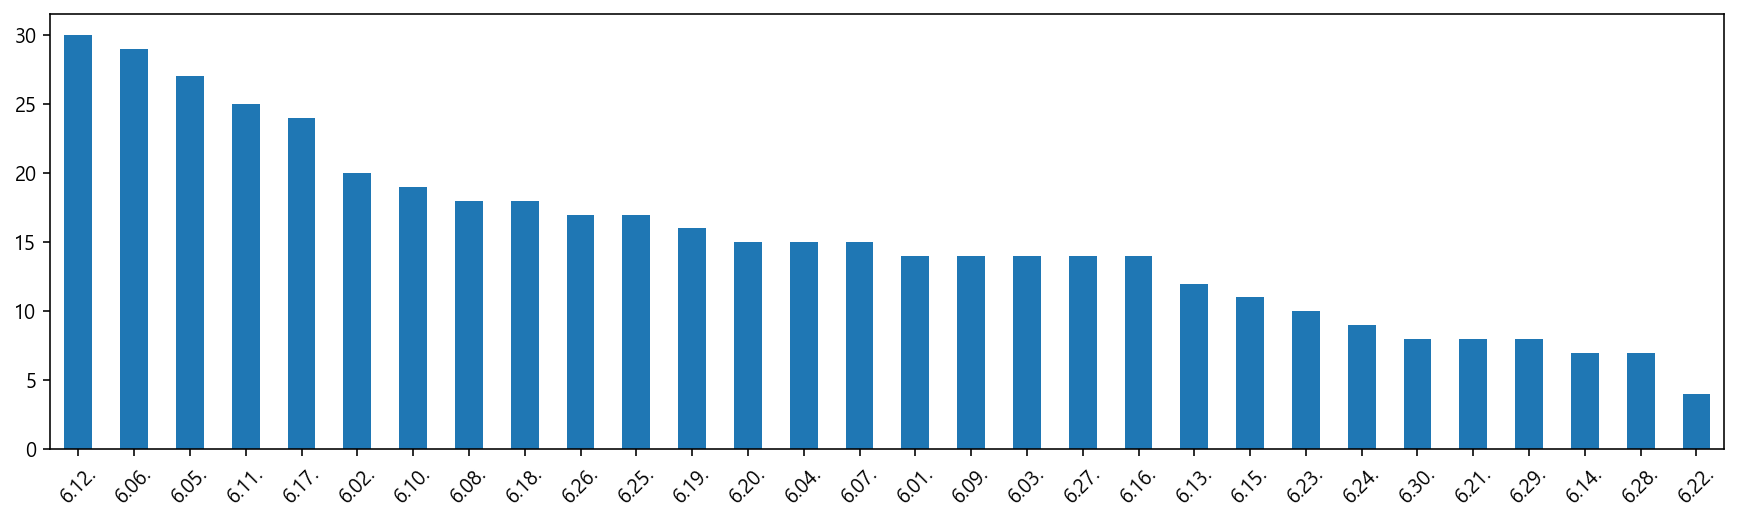

In [26]:
# test
df[df["월"]==6]["확진일"].value_counts().plot.bar(rot=45, figsize=(15,4))

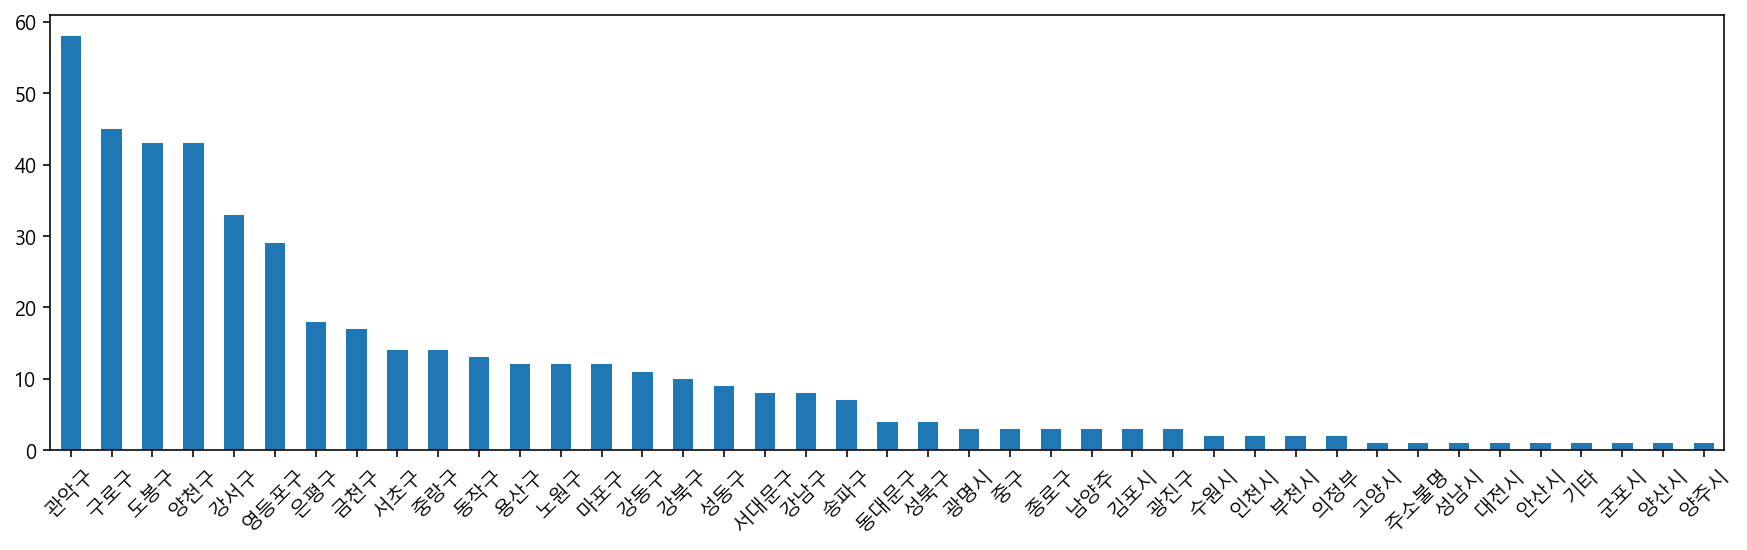

In [27]:
# test
df[df["월"]==6]["거주지"].value_counts().plot.bar(rot=45, figsize=(15,4))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 <a list of 39 Text major ticklabel objects>)

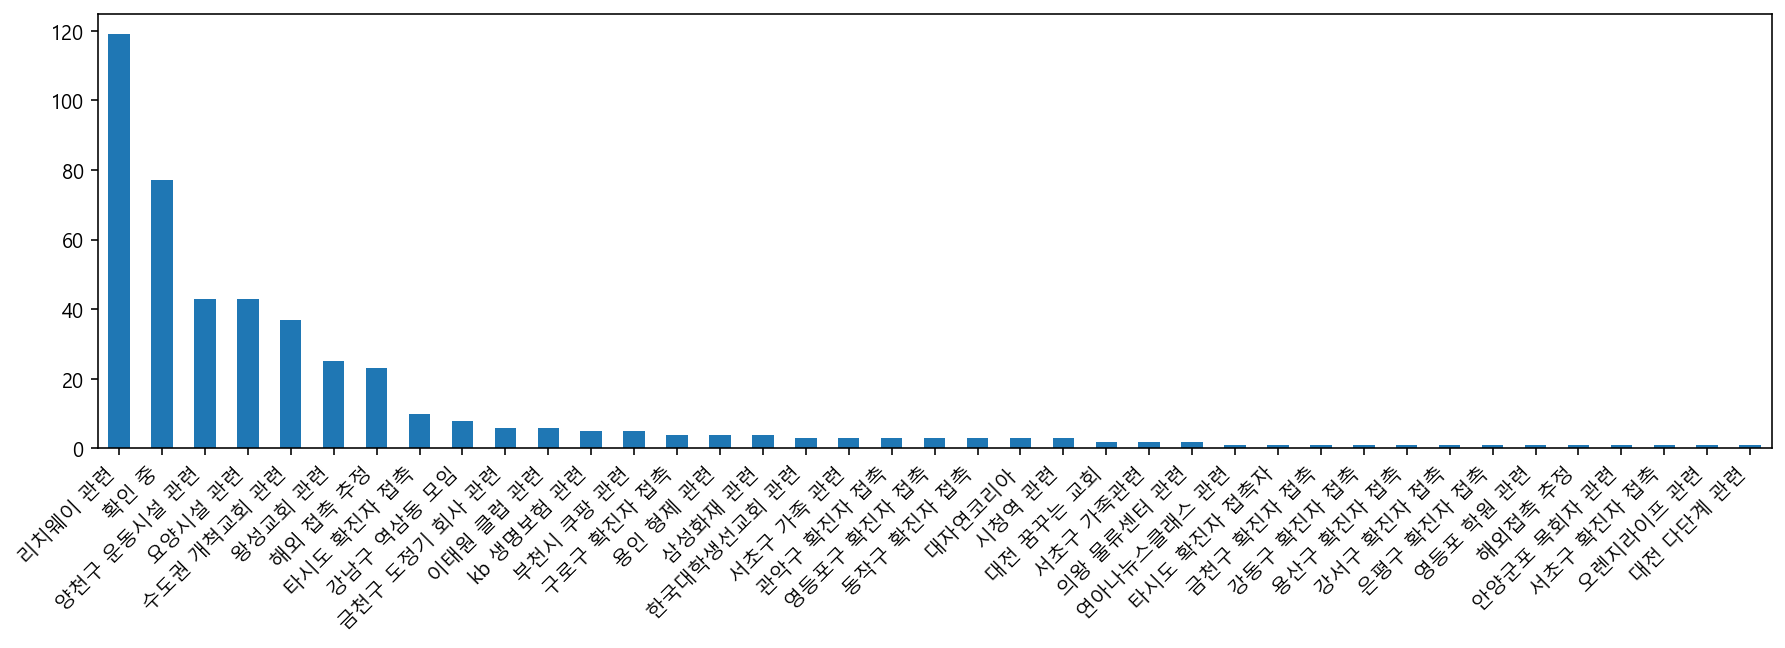

In [28]:
# test
df[df["월"]==6]["접촉력"].value_counts().plot.bar(rot=45, figsize=(15,4))
plt.xticks(horizontalalignment='right')

6월에는 리치웨이 관련, 양천구 운동시설, 요양시설, 교회 등에서 다수 발생

## 주단위 확진자 수 그리기

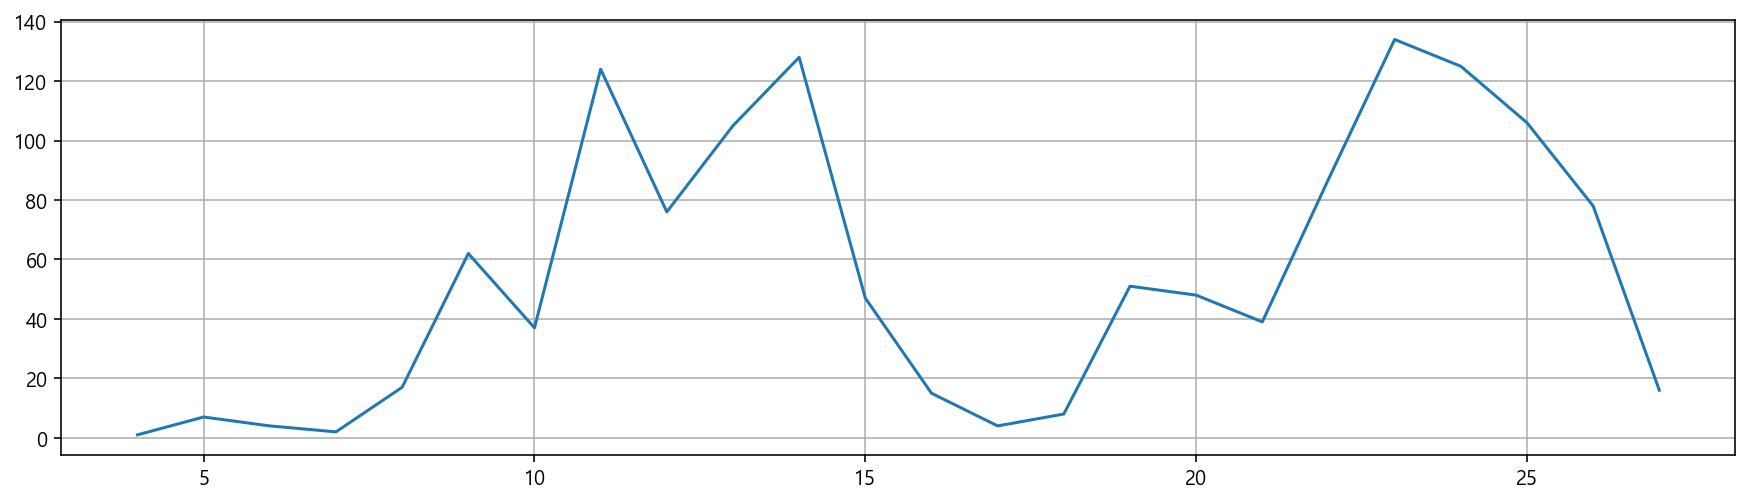

In [29]:
weekly_case = df["주"].value_counts().sort_index()
weekly_case.plot(figsize=(15, 4))
plt.grid(True)

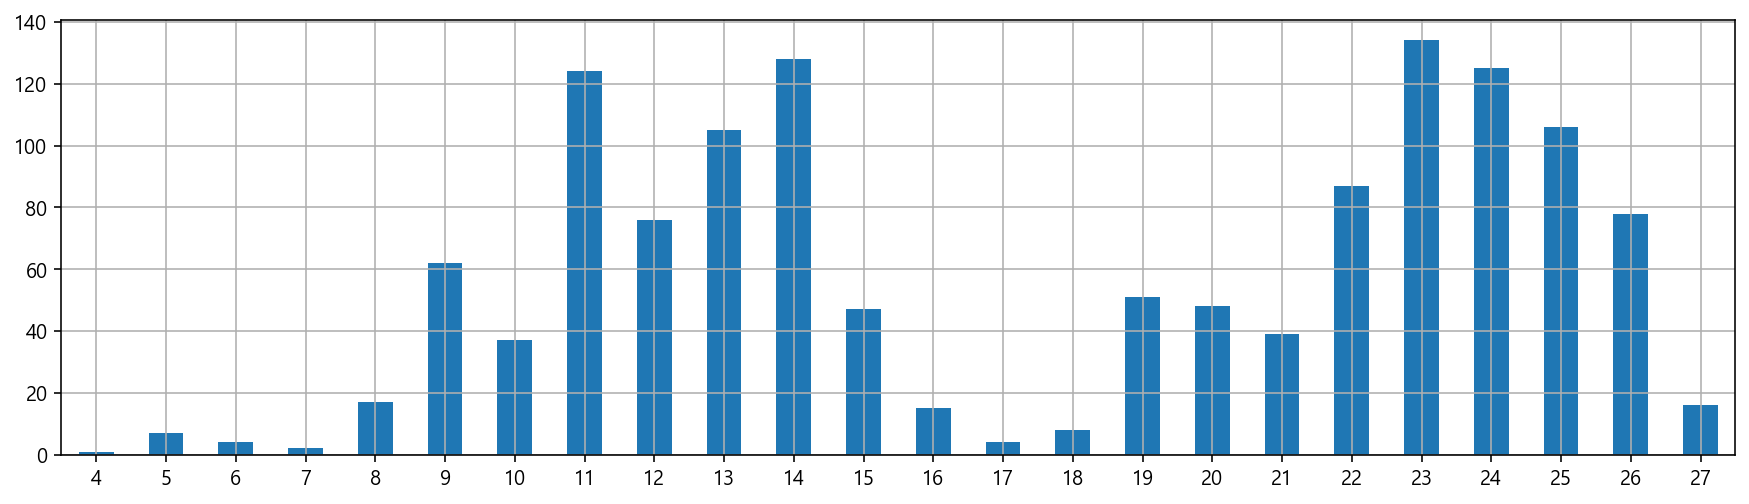

In [30]:
weekly_case = df["주"].value_counts().sort_index()
weekly_case.plot.bar(figsize=(15, 4), rot=0)
plt.grid(True)

11주에 확진자 증가, 23주에 확진자 증가

## 월-주 함께 그리기

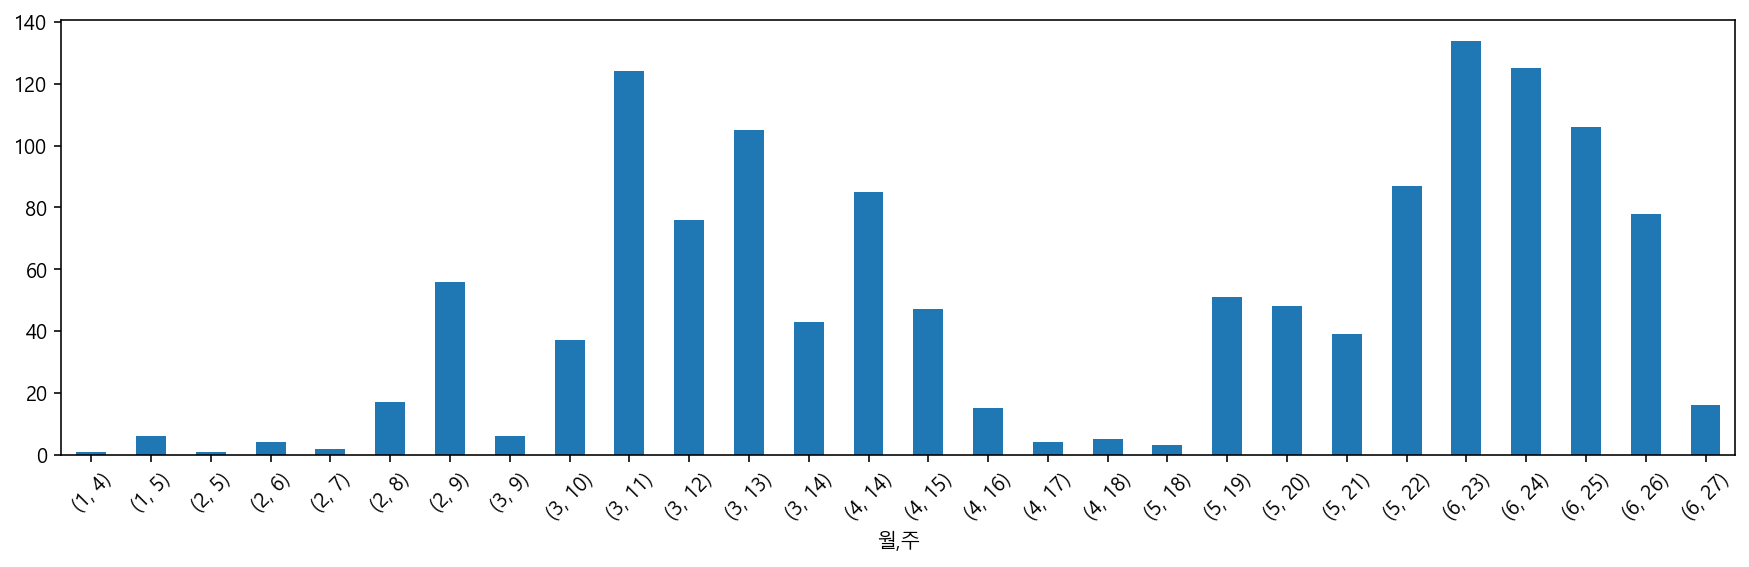

In [31]:
month_weekly_case = df[["월","주"]].value_counts().sort_index()
month_weekly_case.plot.bar(rot=45, figsize=(15, 4))

# 모든 날짜를 행에 만들어 주기
* 확진자가 없는 날에는 Nan을 대입하여 분석해보자!
    * 1) 최초 확진날짜 ~ 마지막 확진날짜를 모두 포함한 데이터프레임 생성
    * 2) 기존 df에서 확진날짜에 따른 확진자수 추출
    * 3) 1)과 2) 데이터프레임 merge!

In [32]:
# 확진자가 발생한 날짜 사이에 확진자가 없는 날짜 확인 가능
df["확진일"].unique()

array(['6.30.', '6.29.', '6.28.', '6.27.', '6.26.', '6.25.', '6.24.',
       '6.23.', '6.22.', '6.21.', '6.20.', '6.19.', '6.18.', '6.17.',
       '6.16.', '6.15.', '6.14.', '6.13.', '6.12.', '6.11.', '6.10.',
       '6.09.', '6.08.', '6.05.', '6.07.', '6.06.', '6.04.', '6.03.',
       '6.02.', '6.01.', '5.31.', '5.30.', '5.29.', '5.27.', '5.28.',
       '5.26.', '5.25.', '5.24.', '5.23.', '5.22.', '5.21.', '5.20.',
       '5.19.', '5.18.', '5.17.', '5.16.', '5.15.', '5.14.', '5.13.',
       '5.12.', '5.11.', '5.10.', '5.09.', '5.9.', '5.08.', '5.02.',
       '5.01.', '4.30.', '4.27.', '4.24.', '4.21.', '4.20.', '4.19.',
       '4.18.', '4.17.', '4.16.', '4.15.', '4.14.', '4.13.', '4.12.',
       '4.11.', '4.10.', '4.06.', '4.09.', '4.08.', '4.07.', '4.05.',
       '4.04.', '4.3.', '4.02.', '4.01.', '3.31.', '3.30.', '3.29.',
       '3.27.', '3.28.', '3.25.', '3.26.', '3.24.', '3.23.', '3.22.',
       '3.21.', '3.20.', '3.19.', '3.18.', '3.17.', '3.16.', '3.15.',
       '3.14.', '3.13.

* 첫 번째 확진일 ~ 마지막 확진일 전체 날짜에 대한 확진자수 데이터프레임을 만들어보자!
    * (cf) %timeit
        * 코드 한 줄을 n번(default: 7번) 실행시킬 때의 평균 소요시간(mean) 및 표준편차(std) 확인 가능

In [33]:
# 첫 번째 확진일자
%timeit first_day = df.iloc[-1, 7] # 7: df의 확진일자 칼럼 인덱스

46.9 µs ± 2.25 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [34]:
# 마지막 확진일자
%timeit last_day = df.iloc[0, 7]

46.5 µs ± 2.35 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [35]:
# %timeit은 단순히 코드 실행 시간을 측정한 것이므로, 아래처럼 정의를 하는게 맞는지?
first_day = df.iloc[-1, 7]
last_day = df.iloc[0, 7]

In [36]:
# 전체 first_day(2020-01-24) ~ last_day(2020-06-30) 사이의 모든 날짜 생성
days = pd.date_range(first_day, last_day)
days

DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02',
               ...
               '2020-06-21', '2020-06-22', '2020-06-23', '2020-06-24',
               '2020-06-25', '2020-06-26', '2020-06-27', '2020-06-28',
               '2020-06-29', '2020-06-30'],
              dtype='datetime64[ns]', length=159, freq='D')

In [37]:
# 데이터프레임으로 생성
df_days = pd.DataFrame({"확진일자": days})
df_days.head()

,확진일자
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28


In [38]:
# 기존 df를 참조하여 확진일에 따른 확진자수 추출
daily_case = df["확진일자"].value_counts()
daily_case

2020-03-10    46
2020-06-12    30
2020-06-06    29
2020-06-05    27
2020-03-09    26
              ..
2020-01-24     1
2020-04-24     1
2020-04-19     1
2020-04-20     1
2020-04-15     1
Name: 확진일자, Length: 130, dtype: int64

In [39]:
# 데이터프레임으로 변환 및 칼럼명 변경
df_daily_case = daily_case.to_frame()
df_daily_case.columns = ["확진수"]
df_daily_case

,확진수
2020-03-10,46
2020-06-12,30
2020-06-06,29
2020-06-05,27
2020-03-09,26
...,...
2020-01-24,1
2020-04-24,1
2020-04-19,1
2020-04-20,1


In [40]:
# 최종 df_days와 df_daily_case 데이터프레임 merge 수행
df_days.sample()

,확진일자
79,2020-04-12


## merge를 통해 전체 확진일자 만들기

In [41]:
all_days = df_days.merge(df_daily_case, left_on="확진일자", right_index=True, how='left')
all_days

,확진일자,확진수
0,2020-01-24,1.0
1,2020-01-25,NaN
2,2020-01-26,NaN
3,2020-01-27,NaN
4,2020-01-28,NaN
...,...,...
154,2020-06-26,17.0
155,2020-06-27,14.0
156,2020-06-28,7.0
157,2020-06-29,8.0


# 누적 확진자 수 구하기
* 위 all_days(전체 날짜 기준 확진자수) 데이터프레임을 사용하면, 누적 확진자수를 알 수 있음

In [42]:
# all_days 데이터프레임 결측치를 '0'으로 채운 이후, 누적합(cumsum)을 계산하여 새로운 칼럼 데이터로 생성
all_days["확진수"] = all_days["확진수"].fillna(0)
all_days["누적확진"] = all_days["확진수"].cumsum()
all_days

,확진일자,확진수,누적확진
0,2020-01-24,1.0,1.0
1,2020-01-25,0.0,1.0
2,2020-01-26,0.0,1.0
3,2020-01-27,0.0,1.0
4,2020-01-28,0.0,1.0
...,...,...,...
154,2020-06-26,17.0,1284.0
155,2020-06-27,14.0,1298.0
156,2020-06-28,7.0,1305.0
157,2020-06-29,8.0,1313.0


In [43]:
all_days["일자"] = all_days["확진일자"].astype(str).map(lambda x: x[-5:])
all_days

,확진일자,확진수,누적확진,일자
0,2020-01-24,1.0,1.0,01-24
1,2020-01-25,0.0,1.0,01-25
2,2020-01-26,0.0,1.0,01-26
3,2020-01-27,0.0,1.0,01-27
4,2020-01-28,0.0,1.0,01-28
...,...,...,...,...
154,2020-06-26,17.0,1284.0,06-26
155,2020-06-27,14.0,1298.0,06-27
156,2020-06-28,7.0,1305.0,06-28
157,2020-06-29,8.0,1313.0,06-29


In [44]:
# 시각화를 위해 필요한 칼럼만 가져옴!
cum_day = all_days[["일자", "확진수", "누적확진"]]
# plot() 선 그래프를 그리기 위해 "일자" 칼럼을 데이터프레임 index로 설정
cum_day = cum_day.set_index("일자")
cum_day.head()

,확진수,누적확진
일자,,
01-24,1.0,1.0
01-25,0.0,1.0
01-26,0.0,1.0
01-27,0.0,1.0
01-28,0.0,1.0


## 데이터프레임으로 그리기

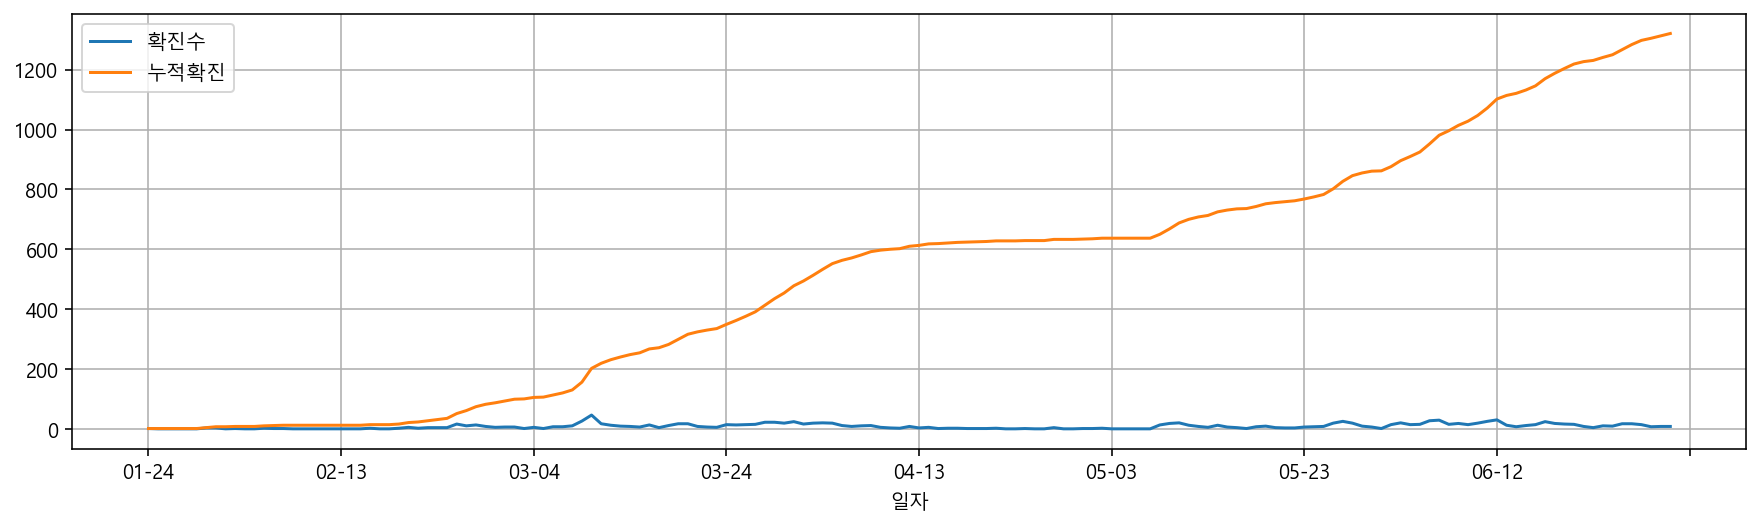

In [45]:
# 확진수, 누적확진수 시각화

cum_day.plot(figsize=(15,4))
plt.grid(True)

4월13일~ 5월초까지는 확진자수 증가세가 다소 주춤하지만, 누적 확진자수가 꾸준히 증가하는 추세.

## 시리즈로 그리기

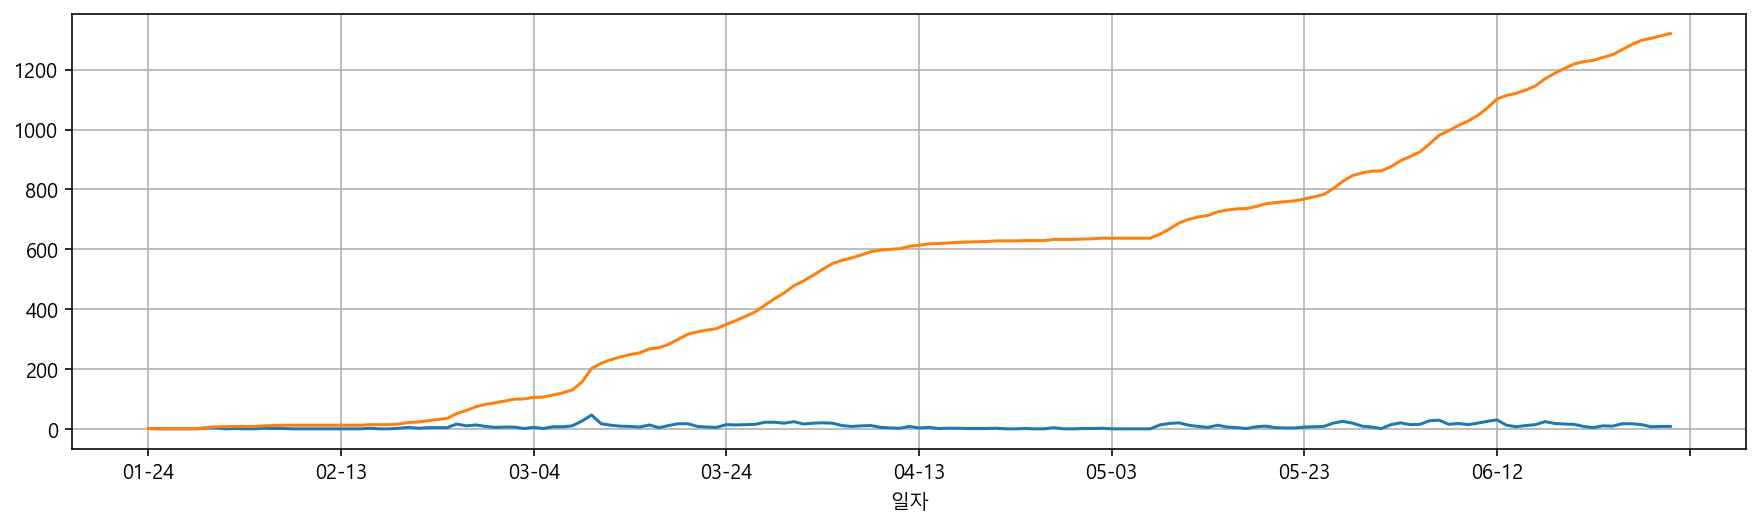

In [46]:
# 확진수와 누적확진 칼럼 데이터를 각각 .plot() 수행!
# -> 위 셀과 동일한 결과
# -> Series를 각각 따로 .plot() 할 수 있음. 
cum_day["확진수"].plot()
cum_day["누적확진"].plot(figsize=(15,4))
plt.grid(True)

## 확진수만 따로 그리기

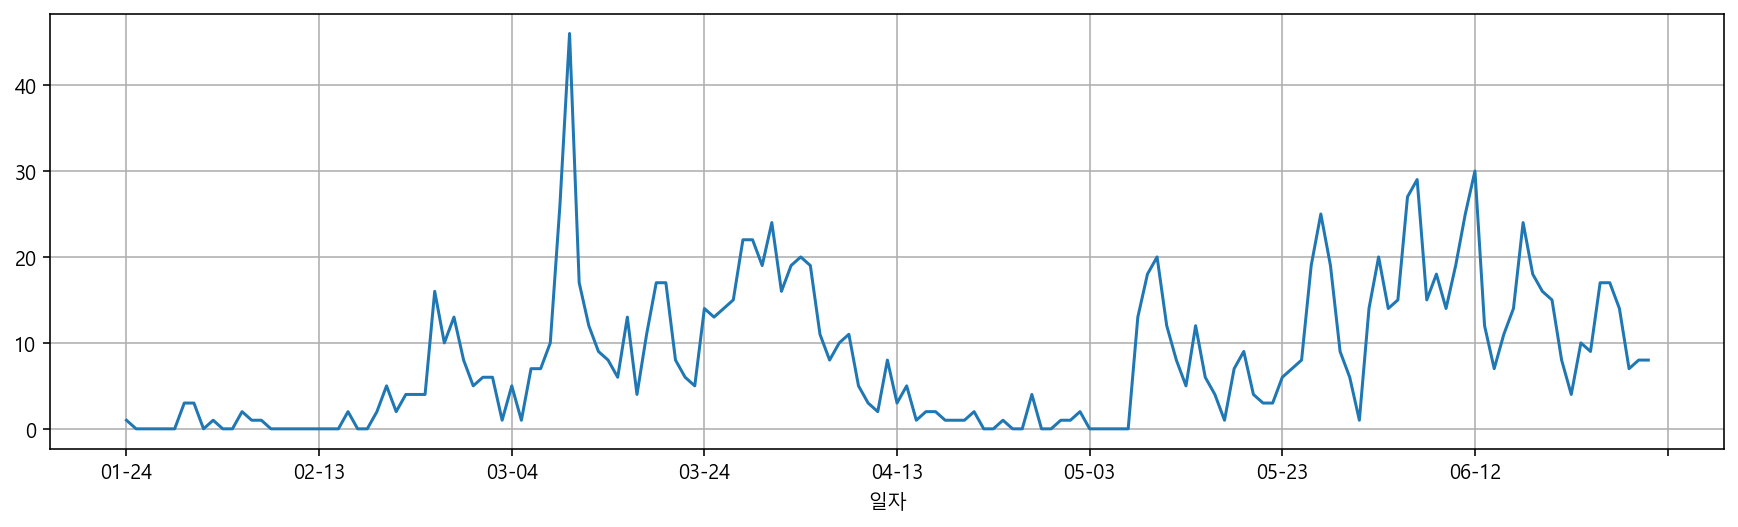

In [47]:
# 누적확진과 확진수 간의 차이가 크면 확진수가 잘 안보일 수 있기 때문에 확진수만 따로 시각화
cum_day["확진수"].plot(figsize=(15,4))
plt.grid(True)

## 누적확진만 따로 그리기

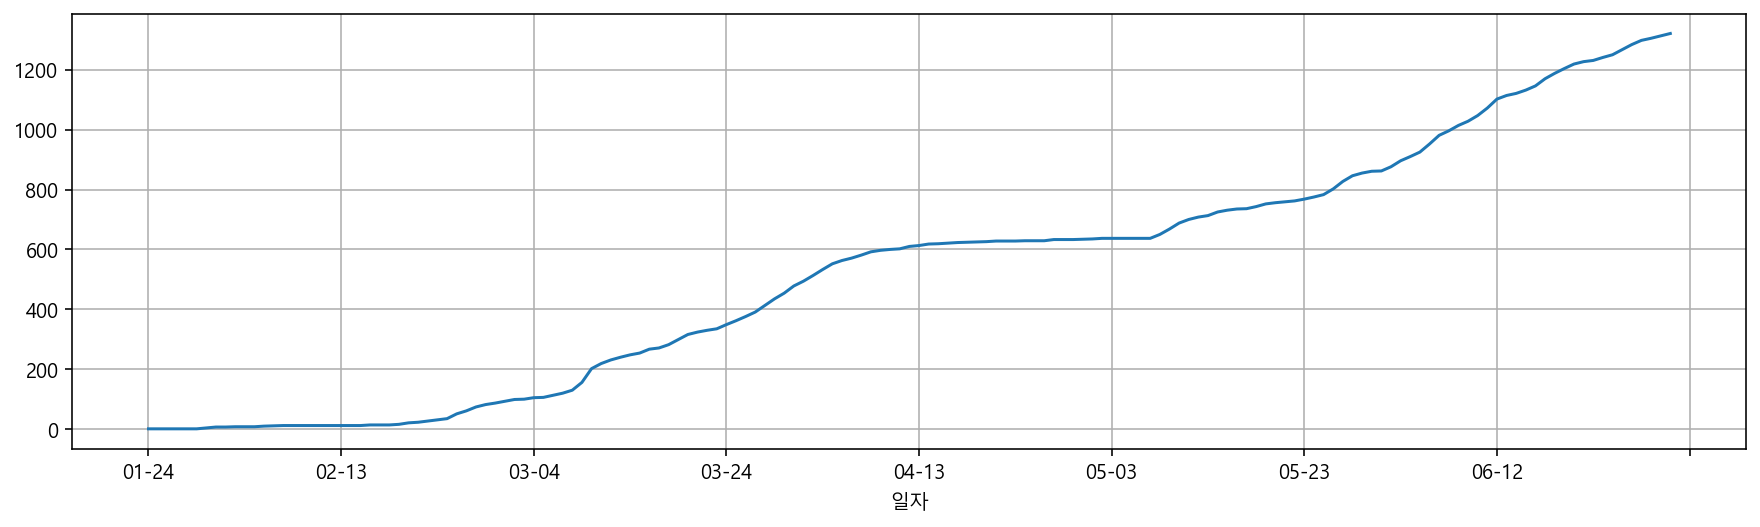

In [48]:
cum_day["누적확진"].plot(figsize=(15,4))
plt.grid(True)

## 로그 스케일
* 시각화 한 데이터 간의 차이가 너무 큰 경우에는 '로그 스케일'로 변환하면, 더 쉽게 알아볼 수 있습니다.

c:\users\pc\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


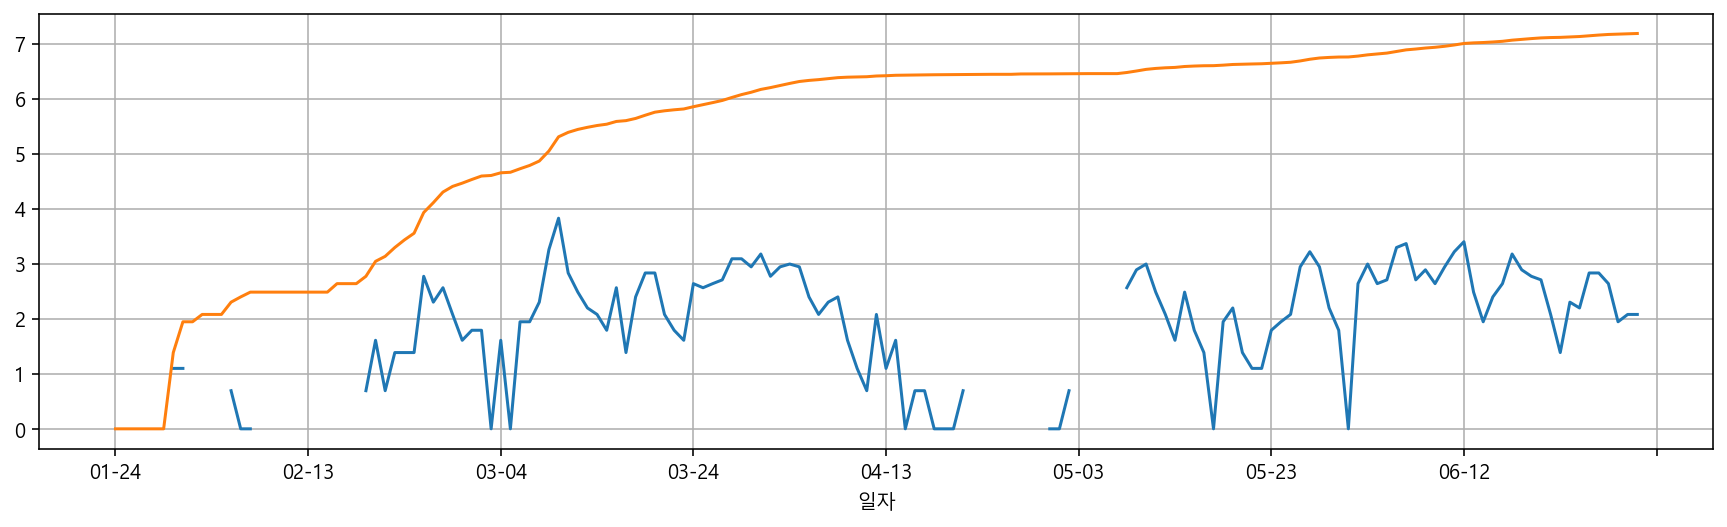

In [49]:
np.log(cum_day["확진수"]).plot(figsize=(15,4))
np.log(cum_day["누적확진"]).plot()
plt.grid(True)

로그 스케일로 변환하기 전 데이터가 '0'인 경우에는 로그 스케일로 변환 시, 무한대로 발산하므로, 위와 같이 중간에 짤려있는 결과가 나옴을 알 수 있음

## 확진월과 요일 구하기

In [50]:
all_days["확진월"] = all_days["확진일자"].dt.month
all_days["확진요일"] = all_days["확진일자"].dt.dayofweek
all_days.head()

,확진일자,확진수,누적확진,일자,확진월,확진요일
0,2020-01-24,1.0,1.0,01-24,1,4
1,2020-01-25,0.0,1.0,01-25,1,5
2,2020-01-26,0.0,1.0,01-26,1,6
3,2020-01-27,0.0,1.0,01-27,1,0
4,2020-01-28,0.0,1.0,01-28,1,1


# 요일별 확진 수

In [51]:
# (월, 요일)별 확진자수 확인
all_day_week = all_days.groupby(["확진월", "확진요일"])["확진수"].sum()
all_day_week = all_day_week.unstack().astype(int) # unstack 사용 -> 테이블 형태로 보기 쉽게 변경
all_day_week

확진요일,0,1,2,3,4,5,6
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,66,66,75,90,70,37


In [52]:
all_day_week.columns = ["월", "화", "수", "목", "금", "토", "일"]
all_day_week

,월,화,수,목,금,토,일
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,66,66,75,90,70,37


In [53]:
all_day_week.style.background_gradient(cmap="Blues")

,월,화,수,목,금,토,일
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,66,66,75,90,70,37


3월 월,화,일 / 6월 수,목,금,토에 발생한 확진자수가 많다.

# 거주지별 확진자

In [54]:
gu_count = df["거주지"].value_counts()
gu_count

관악구     117
구로구      86
강남구      83
강서구      78
양천구      70
영등포구     65
도봉구      62
서초구      56
송파구      55
동작구      53
은평구      53
용산구      50
성동구      49
노원구      43
마포구      39
동대문구     38
강동구      35
서대문구     35
중랑구      33
성북구      33
금천구      32
강북구      24
종로구      22
광진구      17
중구       12
광명시       8
고양시       7
남양주       5
김포시       5
인천시       5
성남시       5
스페인       4
수원시       3
양주시       3
양평        3
부천시       3
천안시       2
용인시       2
대구시       2
구리시       2
대전시       2
의정부       2
국외거주      1
군포시       1
기타        1
경북        1
화성시       1
부평        1
주소불명      1
파주시       1
아산시       1
안산시       1
의왕시       1
시흥시       1
안양시       1
안양        1
미국        1
재외국민      1
평택시       1
양산시       1
Name: 거주지, dtype: int64

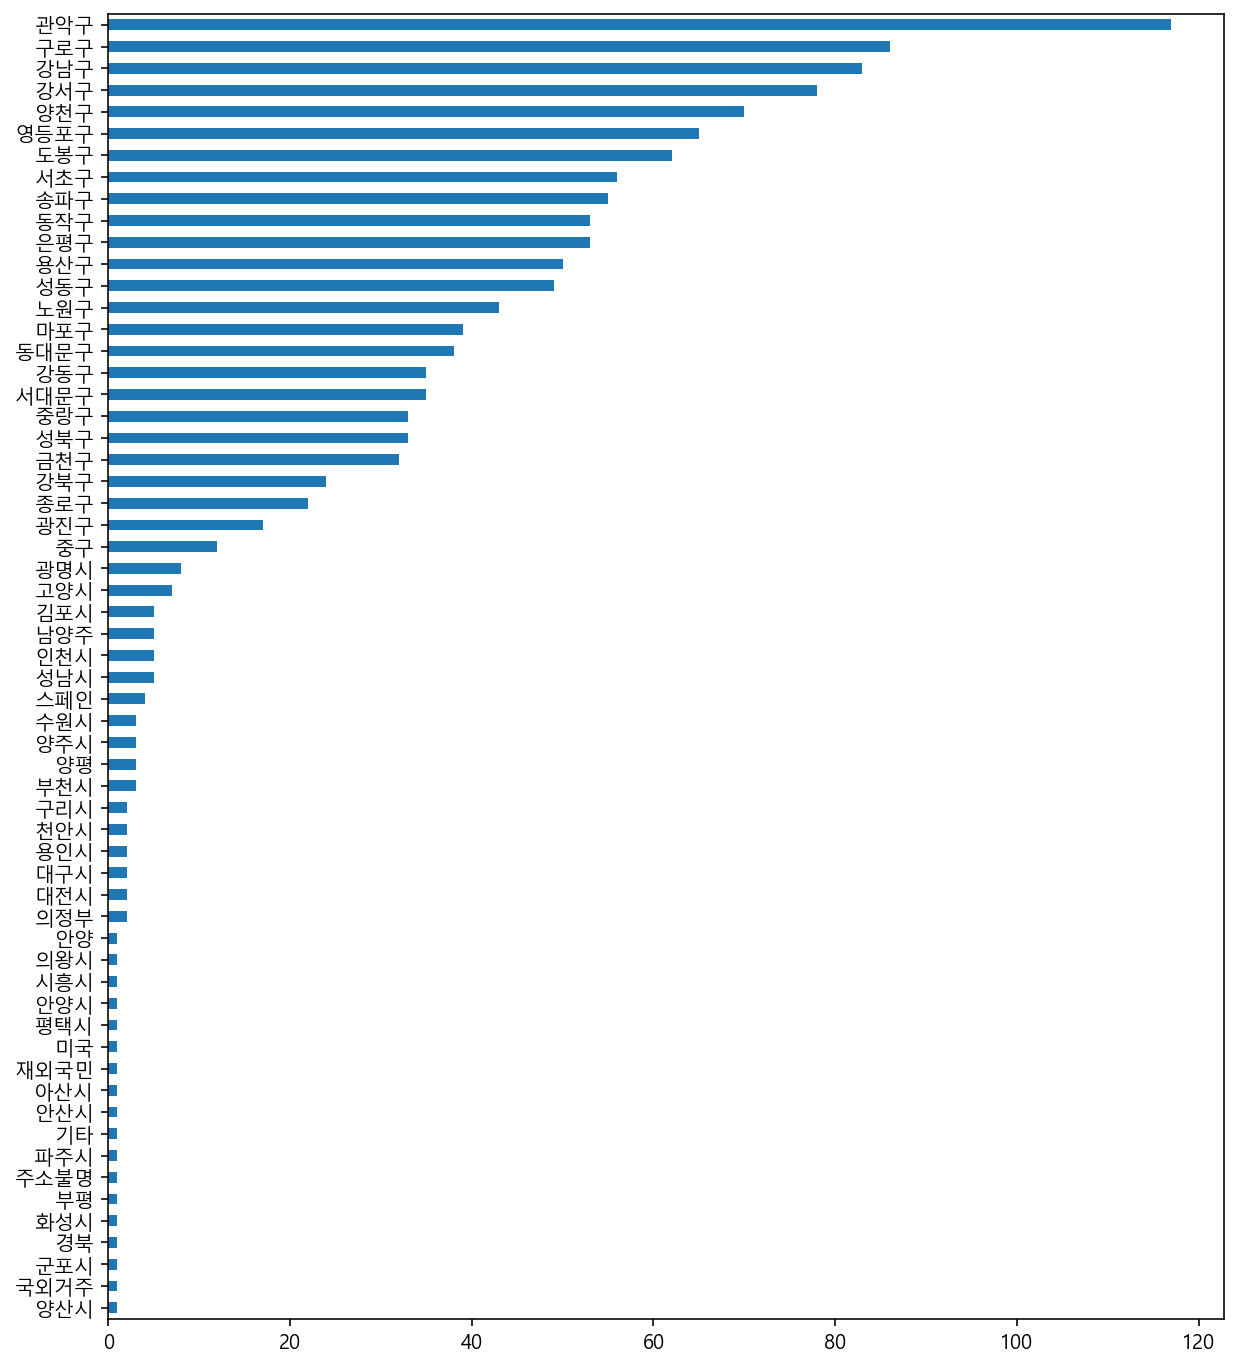

In [55]:
gu_count.sort_values().plot.barh(figsize=(10, 12))

관악구에 '거주하는' 확진자가 압도적으로 가장 많았고, 구로구, 강남구 순 ..

그런데 위 결과는 거주지가 서울이 아닌 경우도 포함되어 있음.!(서울에서 확진 판정을 받았기 때문에!) 따라서 서울시에 해당하는 데이터만 추출해보자.

In [56]:
# 서울시 거주자는 모두 '구' 단위로 표시함!
gu_count = gu_count[gu_count.index.str[-1]=='구']
gu_count

관악구     117
구로구      86
강남구      83
강서구      78
양천구      70
영등포구     65
도봉구      62
서초구      56
송파구      55
동작구      53
은평구      53
용산구      50
성동구      49
노원구      43
마포구      39
동대문구     38
강동구      35
서대문구     35
중랑구      33
성북구      33
금천구      32
강북구      24
종로구      22
광진구      17
중구       12
Name: 거주지, dtype: int64

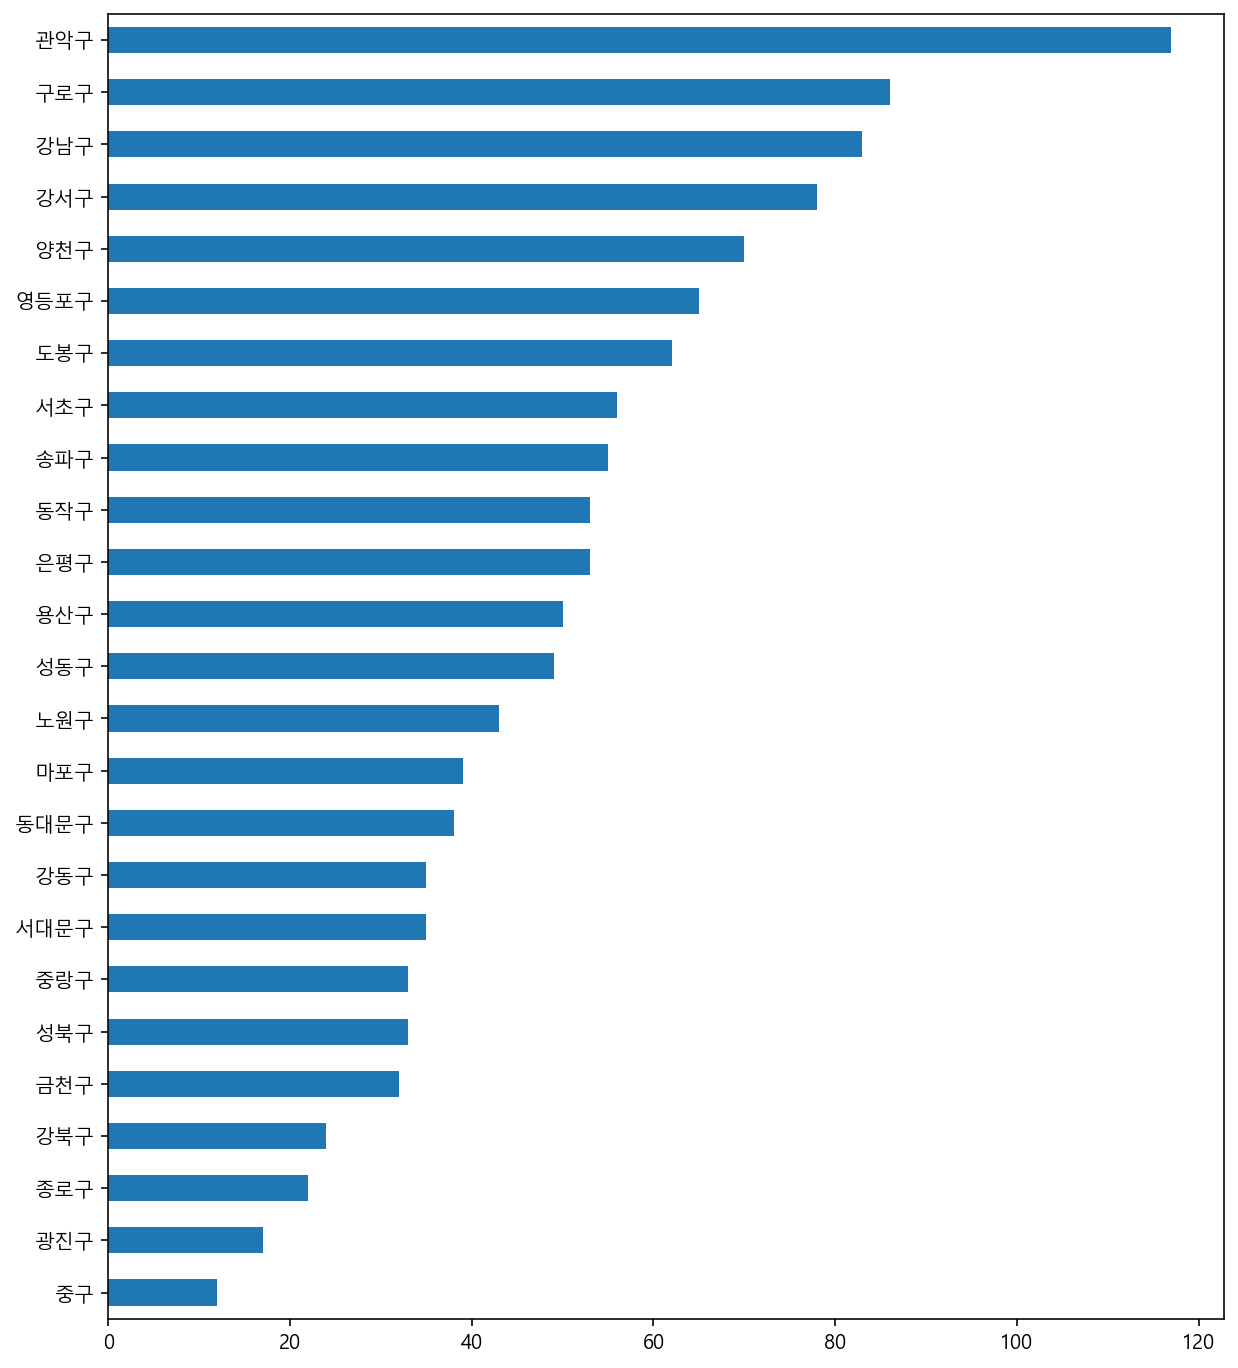

In [57]:
gu_count.sort_values().plot.barh(figsize=(10,12))

<font color='red'>위 결과를 '서울시 지도'에 시각화하여 나타내면 한 눈에 보기 쉬울 것 같다!</font> -> folium 사용? 

In [58]:
df_gu_count = gu_count.reset_index().rename(columns={"index": '구', "거주지": '확진수'})
df_gu_count.head()

,구,확진수
0,관악구,117
1,구로구,86
2,강남구,83
3,강서구,78
4,양천구,70


그럼 이제 서울 거주자와 타지역 거주자를 비교해보자!

In [59]:
# '지역'이라는 새로운 칼럼을 만들어서 서울 이외의 지역은 '타지역'으로 일괄적으로 채워 넣는다!
df["지역"] = df["거주지"].apply(lambda x: x if x in gu_count.index else '타지역')

In [60]:
df['지역'].unique()

array(['영등포구', '관악구', '금천구', '마포구', '타지역', '은평구', '노원구', '서초구', '송파구',
       '구로구', '용산구', '양천구', '강남구', '동대문구', '중구', '동작구', '광진구', '중랑구',
       '강서구', '종로구', '도봉구', '강동구', '성북구', '성동구', '서대문구', '강북구'],
      dtype=object)

In [61]:
# '지역' 칼럼 데이터 별 확진자 빈도수 
gu_etc_count = df["지역"].value_counts()
gu_etc_count

관악구     117
구로구      86
강남구      83
타지역      81
강서구      78
양천구      70
영등포구     65
도봉구      62
서초구      56
송파구      55
동작구      53
은평구      53
용산구      50
성동구      49
노원구      43
마포구      39
동대문구     38
강동구      35
서대문구     35
성북구      33
중랑구      33
금천구      32
강북구      24
종로구      22
광진구      17
중구       12
Name: 지역, dtype: int64

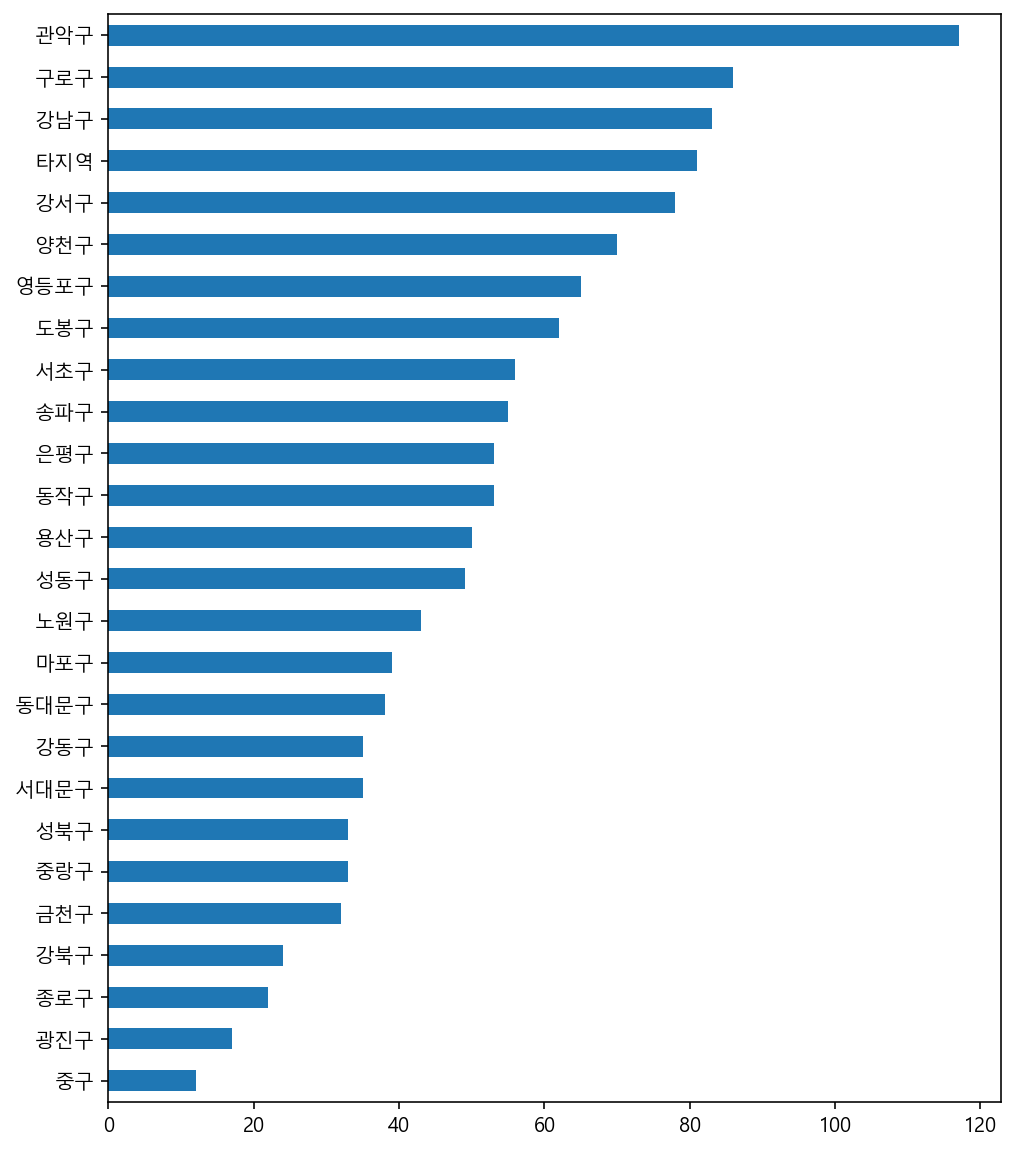

In [62]:
gu_etc_count.sort_values().plot.barh(figsize=(8,10))

타지역 거주자의 서울시에서의 확진도 4위로 꽤 높은 편. 이렇게 되면 이 환자들이 지방으로 내려갔을 때, 감염이 번져 나갈 위험이 있다.

# 접촉력

In [63]:
df["접촉력"].value_counts()

해외 접촉 추정       280
이태원 클럽 관련      139
리치웨이 관련        119
확인 중            99
구로구 콜센터 관련      60
              ... 
#8881 접촉 추정      1
#8057 접촉         1
#8601 접촉         1
#8646 접촉         1
#83 접촉           1
Name: 접촉력, Length: 129, dtype: int64

In [64]:
df["접촉력"].unique()

array(['영등포구 확진자 접촉', '확인 중', '강남구 역삼동 모임', '왕성교회 관련', '대전 꿈꾸는 교회',
       '타시도 확진자 접촉', '리치웨이 관련', '해외 접촉 추정', '용산구 확진자 접촉', '구로구 확진자 접촉',
       '관악구 확진자 접촉', '동작구 확진자 접촉', '금천구 확진자 접촉', '강서구 확진자 접촉', '요양시설 관련',
       '강동구 확진자 접촉', '시청역 관련', '대자연코리아', '의왕 물류센터 관련', '금천구 도정기 회사 관련',
       '양천구 운동시설 관련', '은평구 확진자 접촉', '대전 다단계 관련', '오렌지라이프 관련',
       '수도권 개척교회 관련', '서초구 확진자 접촉', '타시도 확진자 접촉자', '연아나뉴스클래스 관련',
       '한국대학생선교회 관련', '해외접촉 추정', 'kb 생명보험 관련', '부천시 쿠팡 관련', '이태원 클럽 관련',
       '용인 형제 관련', '삼성화재 관련', '서초구 가족 관련', '안양군포 목회자 관련', '서초구 가족관련',
       '영등포 학원 관련', '강남구 동인교회 관련', '원어성경연구회 관련', '#11196 접촉', '삼성서울병원 관련',
       '#10054 접촉', '#9800 접촉', '#10044 접촉', '#9641 접촉', '구로구 교회 관련',
       '#10407 접촉', '#10015 접촉', '#9364 접촉', '#10377 접촉', '#9287 접촉',
       '#10142 접촉', '#9912 접촉', '#9765 접촉', '#10115 접촉', '타시도 확진자 접촉(추정)',
       '#8063 접촉', '#10084 접촉', '#8601 접촉', '#8717 접촉', '#9946 접촉',
       '콜센터직원 접촉', '#8271 접촉', '#8669 접촉', '#9734 접촉', '#9621 접촉',
       '#9572 접촉',

In [65]:
# '확인중' -> '확인 중'으로 변경
df.loc[df["접촉력"].str.contains("확인"), "접촉력"] = "확인 중"

In [66]:
df.loc[df["접촉력"].str.contains("확인"), "접촉력"].unique()

array(['확인 중'], dtype=object)

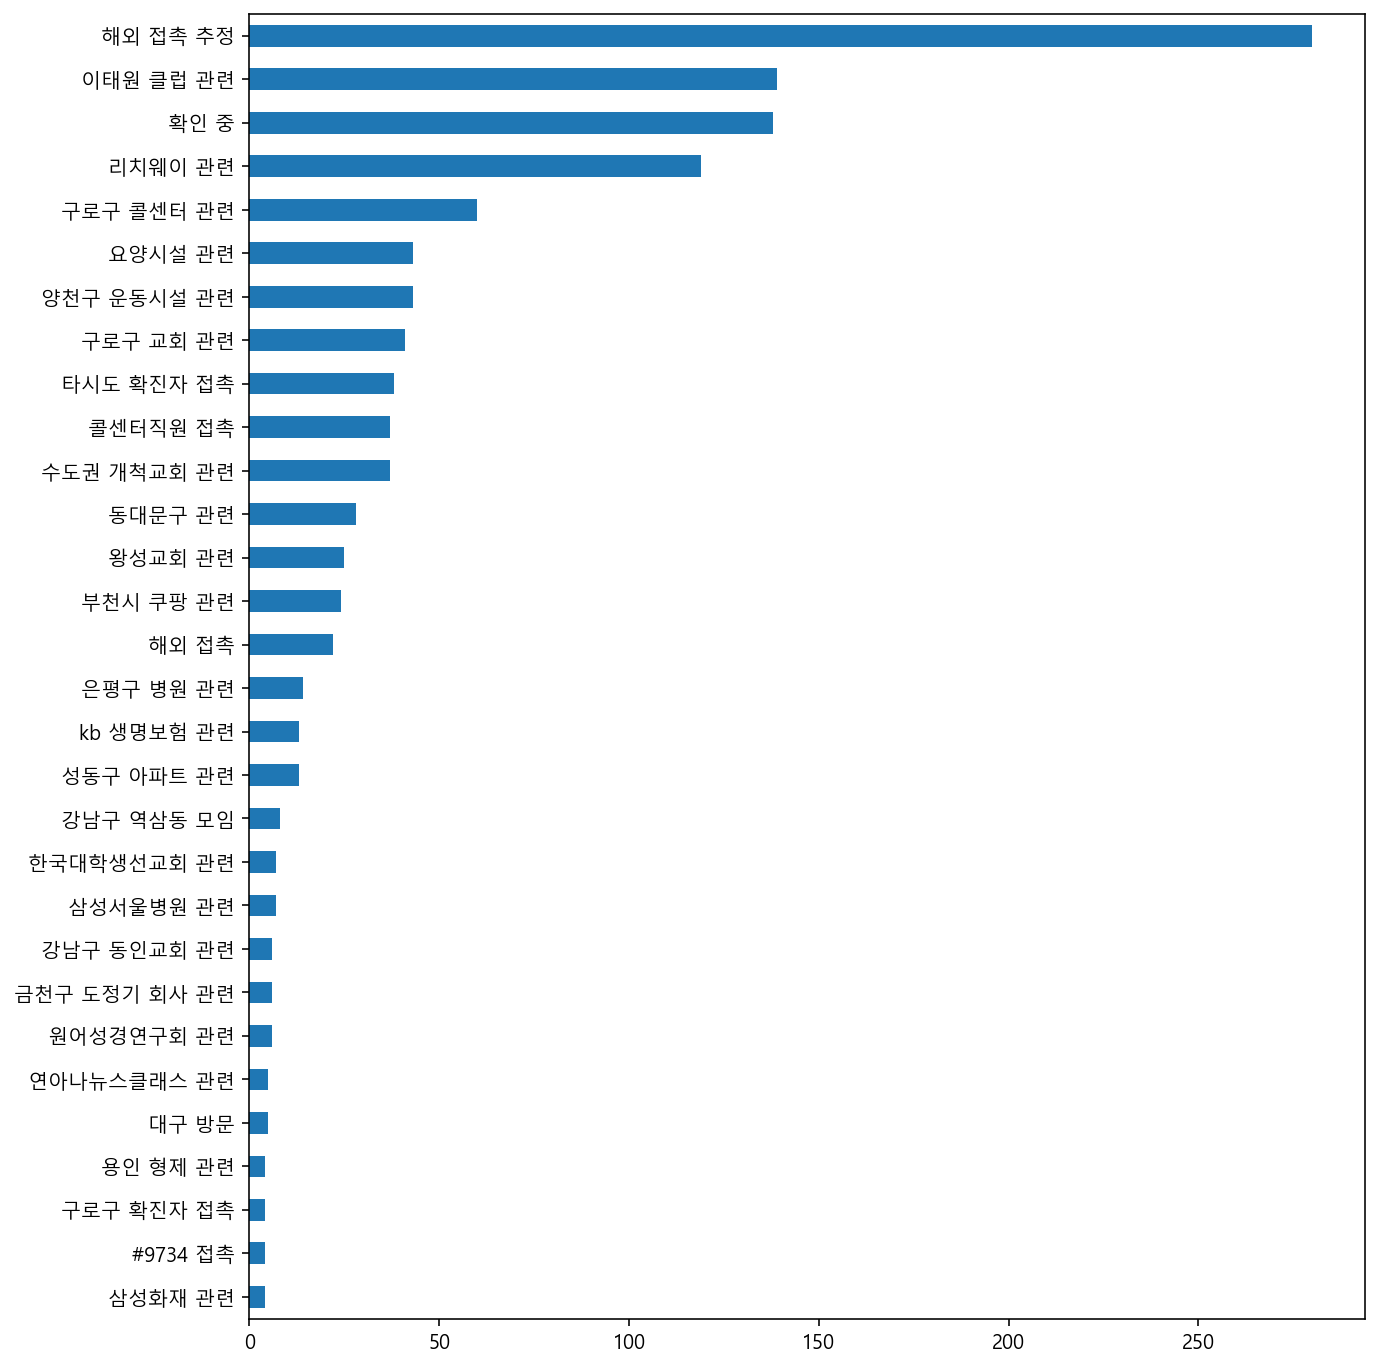

In [67]:
# 접촉력 상위 30개만 시각화 시각화
contact_count_top = df["접촉력"].value_counts().sort_values().tail(30)
contact_count_top.plot.barh(figsize=(10,12))

해외 유입으로 추정되는 경우가 가장 많았고, 이태원 클럽, 리치웨이 확진자 접촉력이 상위권임

In [68]:
# 상위 15개 접촉력
top_contact = contact_count_top.tail(15)
top_contact

해외 접촉           22
부천시 쿠팡 관련       24
왕성교회 관련         25
동대문구 관련         28
수도권 개척교회 관련     37
콜센터직원 접촉        37
타시도 확진자 접촉      38
구로구 교회 관련       41
양천구 운동시설 관련     43
요양시설 관련         43
구로구 콜센터 관련      60
리치웨이 관련        119
확인 중           138
이태원 클럽 관련      139
해외 접촉 추정       280
Name: 접촉력, dtype: int64

In [69]:
# 상위 15개 접촉력에 속하는 경우만 추출
top_group = df[df["접촉력"].isin(top_contact.index)]
top_group

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,지역
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원,2020-06-30,6,27,06-30,관악구
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원,2020-06-30,6,27,06-30,영등포구
6,1315,12810,6.30.,금천구,-,왕성교회 관련,서남병원,2020-06-30,6,27,06-30,금천구
8,1313,12822,6.29.,의정부,-,확인 중,타시도 이관,2020-06-29,6,27,06-29,타지역
9,1312,12789,6.29.,은평구,-,확인 중,서북병원,2020-06-29,6,27,06-29,은평구
...,...,...,...,...,...,...,...,...,...,...,...,...
1312,9,19,2.5.,송파구,싱가포르,해외 접촉,서울의료원(퇴원),2020-02-05,2,6,02-05,송파구
1313,8,13,2.2.,인천시,우한 교민,해외 접촉,국립중앙의료원(퇴원),2020-02-02,2,5,02-02,타지역
1317,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30,마포구
1319,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30,중랑구


In [70]:
# 월별 접촉력이 발생한 횟수 확인!
top_group = top_group.groupby(["접촉력", "월"])["연번"].count().unstack().fillna(0).astype(int)
top_group

월,1,2,3,4,5,6
접촉력,,,,,,
구로구 교회 관련,0,0,35,6,0,0
구로구 콜센터 관련,0,0,60,0,0,0
동대문구 관련,0,0,28,0,0,0
리치웨이 관련,0,0,0,0,0,119
부천시 쿠팡 관련,0,0,0,0,19,5
수도권 개척교회 관련,0,0,0,0,0,37
양천구 운동시설 관련,0,0,0,0,0,43
왕성교회 관련,0,0,0,0,0,25
요양시설 관련,0,0,0,0,0,43


In [71]:
top_group.style.background_gradient(cmap="Blues")

월,1,2,3,4,5,6
접촉력,,,,,,
구로구 교회 관련,0,0,35,6,0,0
구로구 콜센터 관련,0,0,60,0,0,0
동대문구 관련,0,0,28,0,0,0
리치웨이 관련,0,0,0,0,0,119
부천시 쿠팡 관련,0,0,0,0,19,5
수도권 개척교회 관련,0,0,0,0,0,37
양천구 운동시설 관련,0,0,0,0,0,43
왕성교회 관련,0,0,0,0,0,25
요양시설 관련,0,0,0,0,0,43


월별로 접촉력을 볼 수 있다. 6월에 리치웨이, 6월에 이태원 클럽 관련, 3~4월에 해외 접촉 추정 등에서 확진자 다수 발생.

## 이태원 클럽 관련

In [72]:
# 6월 이태원 클럽 관련 확진자 --> why?
df[df["접촉력"].str.contains("이태원") & (df["월"] == 6)]

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,지역
341,980,11786,6.06.,성동구,-,이태원 클럽 관련,서울의료원(퇴원),2020-06-06,6,23,06-06,성동구
356,965,11741,6.06.,은평구,-,이태원 클럽 관련,보라매병원(퇴원),2020-06-06,6,23,06-06,은평구
365,956,11730,6.06.,성동구,-,이태원 클럽 관련,서울대병원,2020-06-06,6,23,06-06,성동구
372,949,11775,6.05.,은평구,-,이태원 클럽 관련,국립중앙의료원(퇴원),2020-06-05,6,23,06-05,은평구
387,934,11687,6.05.,성동구,-,이태원 클럽 관련,보라매병원(퇴원),2020-06-05,6,23,06-05,성동구
445,876,11535,6.01.,강동구,-,이태원 클럽 관련,서울의료원(퇴원),2020-06-01,6,23,06-01,강동구


## 감염경로 불명
* 접촉력이 '확인 중'인 확진자

In [73]:
df_unknown = df[df["접촉력"]=='확인 중']
df_unknown.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,지역
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원,2020-06-30,6,27,06-30,관악구
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원,2020-06-30,6,27,06-30,영등포구
8,1313,12822,6.29.,의정부,-,확인 중,타시도 이관,2020-06-29,6,27,06-29,타지역
9,1312,12789,6.29.,은평구,-,확인 중,서북병원,2020-06-29,6,27,06-29,은평구
10,1311,12784,6.29.,의정부,-,확인 중,타시도 이관,2020-06-29,6,27,06-29,타지역


In [74]:
unknown_weekly_case = df_unknown.groupby(["월", "주"])["연번"].count()
unknown_weekly_case

월  주 
2  9     11
3  10     4
   11    11
   12    10
   13     3
   14     1
4  14     3
   15     5
   16     1
5  20     1
   21     1
   22    10
6  23    18
   24    25
   25    17
   26    12
   27     5
Name: 연번, dtype: int64

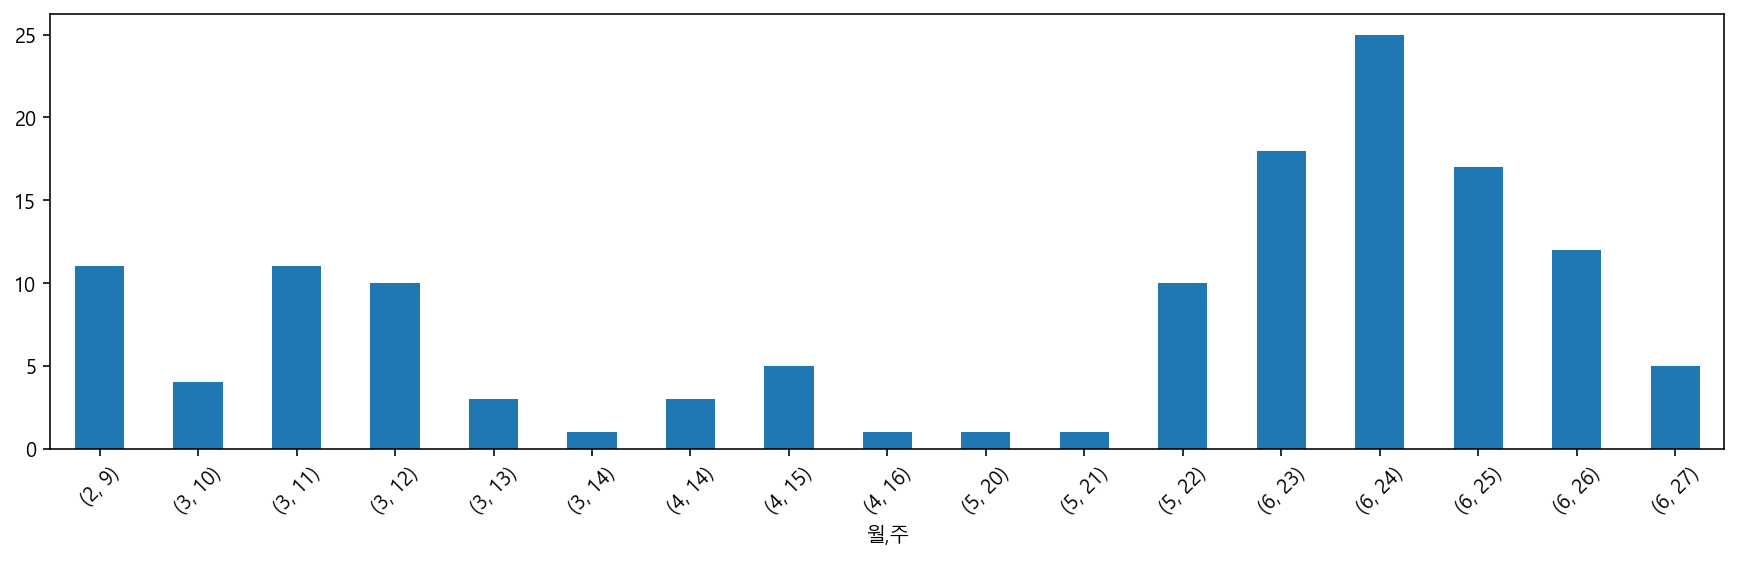

In [75]:
unknown_weekly_case.plot.bar(figsize=(15,4), rot=45)

6월 들어서 발생한 확진자의 경로가 불분명한 경우가 많음 -> 6월에 확진자가 급증한 리치웨이, 집단 감염이 발생한 요양시설, 양천구 운동시설, 수도권 개척교회의 n차 감염일 확률이 높아보인다.

이제 전체 확진자중에 경로가 불분명한 확진자를 '주' 별로 비교해보자.

In [76]:
# 1) 전체 확진수
all_weekly_case = df["주"].value_counts().to_frame()
all_weekly_case.columns = ["전체확진수"]
all_weekly_case.head()

,전체확진수
23,134
14,128
24,125
11,124
25,106


In [77]:
# 2) 경로가 불분명한 확진수
unknown_weekly_case = df_unknown["주"].value_counts().to_frame()
unknown_weekly_case.columns = ["불명확진수"]
unknown_weekly_case.head()

,불명확진수
24,25
23,18
25,17
26,12
11,11


In [78]:
# 1)과 2)를 한 개 데이터프레임으로 merge!
# => how='inner' -> 시각화할때, all_weekly_case와 unknown_weekly_case에 모두 존재하는 데이터만 고려하기 위함!
unknown_case = all_weekly_case.merge(unknown_weekly_case, left_index=True, right_index=True)
unknown_case = unknown_case.sort_index()
unknown_case

,전체확진수,불명확진수
9,62,11
10,37,4
11,124,11
12,76,10
13,105,3
14,128,4
15,47,5
16,15,1
20,48,1
21,39,1


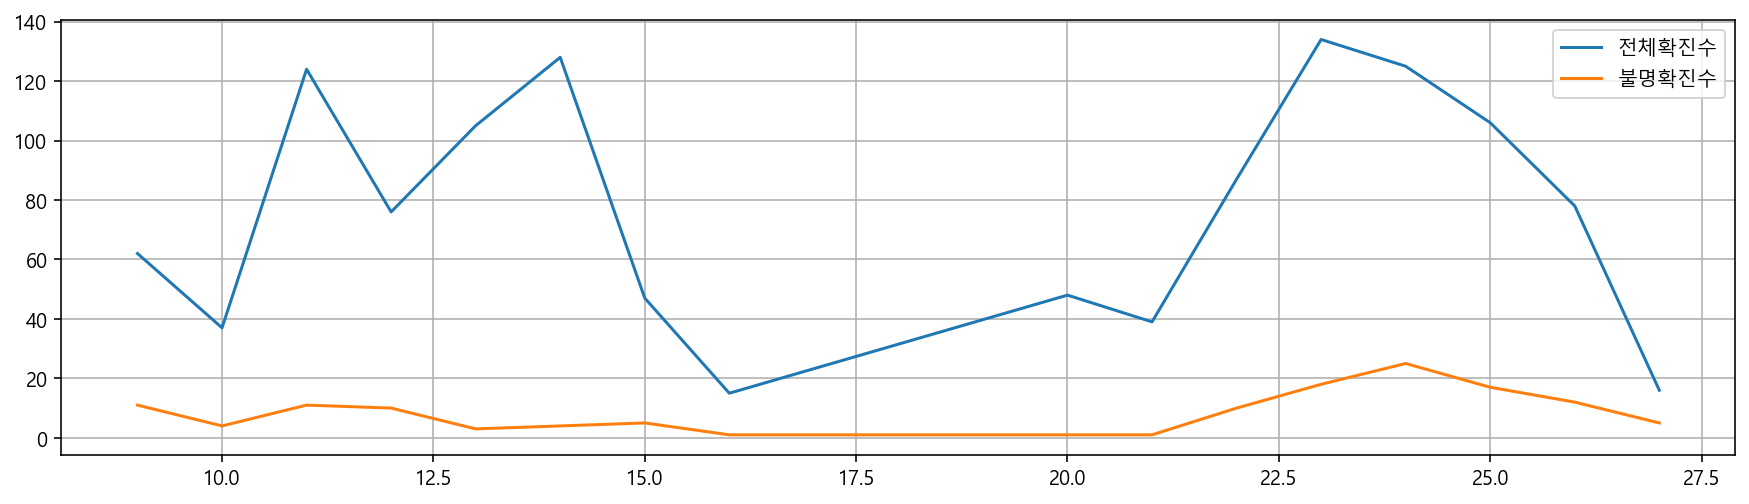

In [79]:
unknown_case.plot(figsize=(15,4))
plt.grid(True)

대체적으로 전체 확진자수가 증가할 때, 감염 경로가 불분명한 확진자도 증가하는 추이.. 올바른 경로를 파악하기 어려운 문제가 있음을 알 수 있음
* -> why? 이동 동선이 너무 많아서 파악하기 어려움? 올바른 이동 동선을 제공하지 않는 경우?

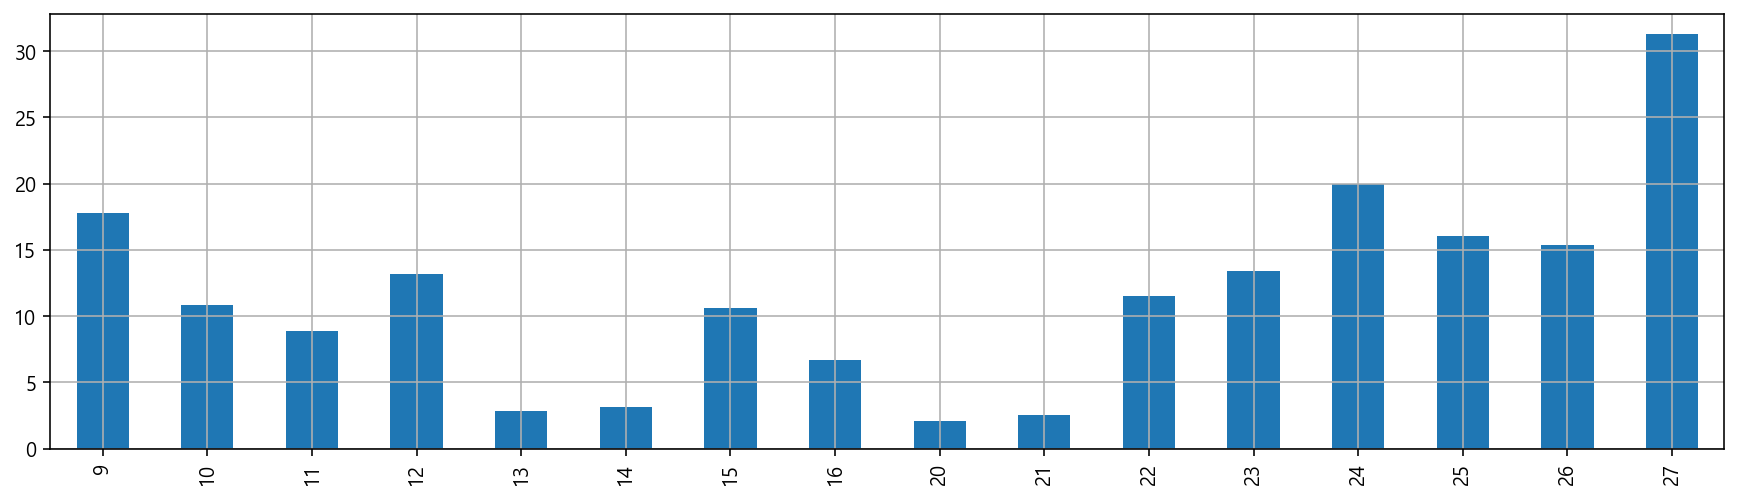

In [80]:
# 전체확진수 중에 불명확인수 비율 시각화
unknown_case["확인중비율"] = (unknown_case["불명확진수"]/unknown_case["전체확진수"])*100
unknown_case["확인중비율"].plot.bar(figsize=(15,4))
plt.grid(True)

27주차에 발생한 확진자중, 감염 경로가 불분명한 확진자 비율이 가장 큼

# 가장 많은 전파가 일어난 번호
* "접촉력" 칼럼에 존재하는 '#접촉번호' 데이터에서 '접촉번호'만 추출하기 위해 '정규표현식' 사용

* 정규표현식
    * [    ] : 일치시킬 문자 세트의 패턴
    * [가나다] : 가 or 나 or 다 중에 하나를 포함하고 있는지
    * [가-힣] : 한글 가부터 힣까의 문자 중 하나를 포함하고 있는지
    * [0-9] : 0~9까지의 숫자 중 하나를 포함하고 있는지
    * [^0-9] : 숫자를 포함하고 있지 않음
    * [^가-힣] : 한글이 포함되어 있지 않음
    * [가-힣+] : 한글이 하나 이상 포함되는지

In [81]:
# 정규표현식 라이브러리 re 임포트
import re

In [82]:
def get_number(text):
    return re.sub('[^0-9]', "", text)

In [83]:
df["접촉번호"] = df["접촉력"].map(get_number)
contact = df["접촉번호"].value_counts().reset_index()
contact.head()

,index,접촉번호
0,,1236
1,9734,4
2,6,4
3,8486,3
4,780,3


In [84]:
# 접촉력이 다른 접촉번호가 아닌 0번행 drop 수행
df_contact = contact.drop(0)
# 상위 10개 항목만 확인
df_contact = df_contact.head(10)
df_contact

,index,접촉번호
1,9734,4
2,6,4
3,8486,3
4,780,3
5,8791,3
6,8271,3
7,9525,2
8,9287,2
9,6832,2
10,8245,2


접촉번호 6번, 9734번에 의한 감염이 가장 많았음

# 조치 사항

In [85]:
# "조치사항"에 대한 빈도수
df["조치사항"].value_counts()

서울의료원(퇴원)      339
보라매병원(퇴원)      186
서남병원(퇴원)       176
생활치료센터(퇴원)      79
서남병원            67
              ... 
경희대학교병원(퇴원)      1
삼육서울병원(사망)       1
서울삼성병원(퇴원)       1
서울대학병원           1
중앙대학교병원          1
Name: 조치사항, Length: 75, dtype: int64

# 퇴원, 사망여부

In [86]:
# 퇴원 또는 사망 포함 여부
# Series.str.contains(""): 문자 포함 여부 확인
df["퇴원"] = df["조치사항"].str.contains("퇴원")
df["사망"] = df["조치사항"].str.contains("사망")

# 병원 이름만 추출
df["병원"] = df["조치사항"].str.replace("\(퇴원\)", "") 
df["병원"] = df["병원"].str.replace("\(사망\)", "") 
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,지역,접촉번호,퇴원,사망,병원
0,1321,12830,6.30.,영등포구,-,영등포구 확진자 접촉,-,2020-06-30,6,27,06-30,영등포구,,False,False,-
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원,2020-06-30,6,27,06-30,관악구,,False,False,보라매병원
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원,2020-06-30,6,27,06-30,영등포구,,False,False,중앙대학교병원
3,1318,12808,6.30.,관악구,-,강남구 역삼동 모임,보라매병원,2020-06-30,6,27,06-30,관악구,,False,False,보라매병원
4,1317,12809,6.30.,관악구,-,강남구 역삼동 모임,보라매병원,2020-06-30,6,27,06-30,관악구,,False,False,보라매병원


In [87]:
# 데이터 수집 시점 기준 퇴원률
df["퇴원"].value_counts(normalize=True)

True     0.776684
False    0.223316
Name: 퇴원, dtype: float64

In [88]:
# 데이터 수집 시점 기준 사망률
df["사망"].value_counts(normalize=True)

False    0.994701
True     0.005299
Name: 사망, dtype: float64

데이터 수집 시점에 퇴원 확률(약 78%)과 사망 확률(0.5%)을 알 수 있다. 대체로 퇴원을 하며, 사망 확률은 매우 낮은 것을 알 수 있음

* 서울 거주하는 환자 중에 데이터 수집 시점 기준 가장 오래 입원한 확진자

In [89]:
# 퇴원 == False & 사망 == False & 지역 != 타지역
df[(df["퇴원"]==False) & (df["사망"]==False) & (df["지역"]!='타지역')].tail(5)

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,지역,접촉번호,퇴원,사망,병원
519,802,11256,5.27.,강서구,-,부천시 쿠팡 관련,강북삼성병원,2020-05-27,5,22,05-27,강서구,,False,False,강북삼성병원
527,794,11242,5.26.,도봉구,-,원어성경연구회 관련,원자력병원,2020-05-26,5,22,05-26,도봉구,,False,False,원자력병원
570,751,11092,5.19.,강북구,-,삼성서울병원 관련,서울삼성병원,2020-05-19,5,21,05-19,강북구,,False,False,서울삼성병원
573,748,11093,5.19.,서초구,-,삼성서울병원 관련,서울삼성병원,2020-05-19,5,21,05-19,서초구,,False,False,서울삼성병원
621,700,10941,5.11.,양천구,-,이태원 클럽 관련,서북병원,2020-05-11,5,20,05-11,양천구,,False,False,서북병원


이태원 클럽에서 감염되어 서북병원에 입원한 서울 양천구 거주자 서울 #700 환자가 데이터 수집 시점(6월 30일) 기준 1개월 이상 입원중

# 병원

In [90]:
hospital_count = df["병원"].value_counts()
hospital_count

서울의료원            395
서남병원             244
보라매병원            240
생활치료센터            88
서북병원              68
국립중앙의료원           61
타시도 이관            48
은평성모병원            15
서울대학교병원           14
상계백병원             12
중앙대학교병원           12
적십자병원             11
서울대병원             10
고대구로병원             8
삼육서울병원             7
한일병원               6
강북삼성병원             6
순천향서울병원            6
서울아산병원             6
중앙대병원              6
순천향병원              6
원자력병원              5
서울성모병원             5
세브란스병원             4
강남성심병원             4
서울삼성병원             3
건국대병원              3
서울백병원              3
한양대병원              3
생활치료시설             2
-                  2
순천향대학병원            2
국군수도통합병원           2
삼성서울병원             2
강남세브란스병원           2
한양대학교병원            2
서울대학병원             1
건대병원               1
고대안암병원             1
국군수도병원             1
경희대학교병원            1
신촌세브란스병원           1
중앙대학병원             1
한양대병원/국립중앙의료원      1
Name: 병원, dtype: int64

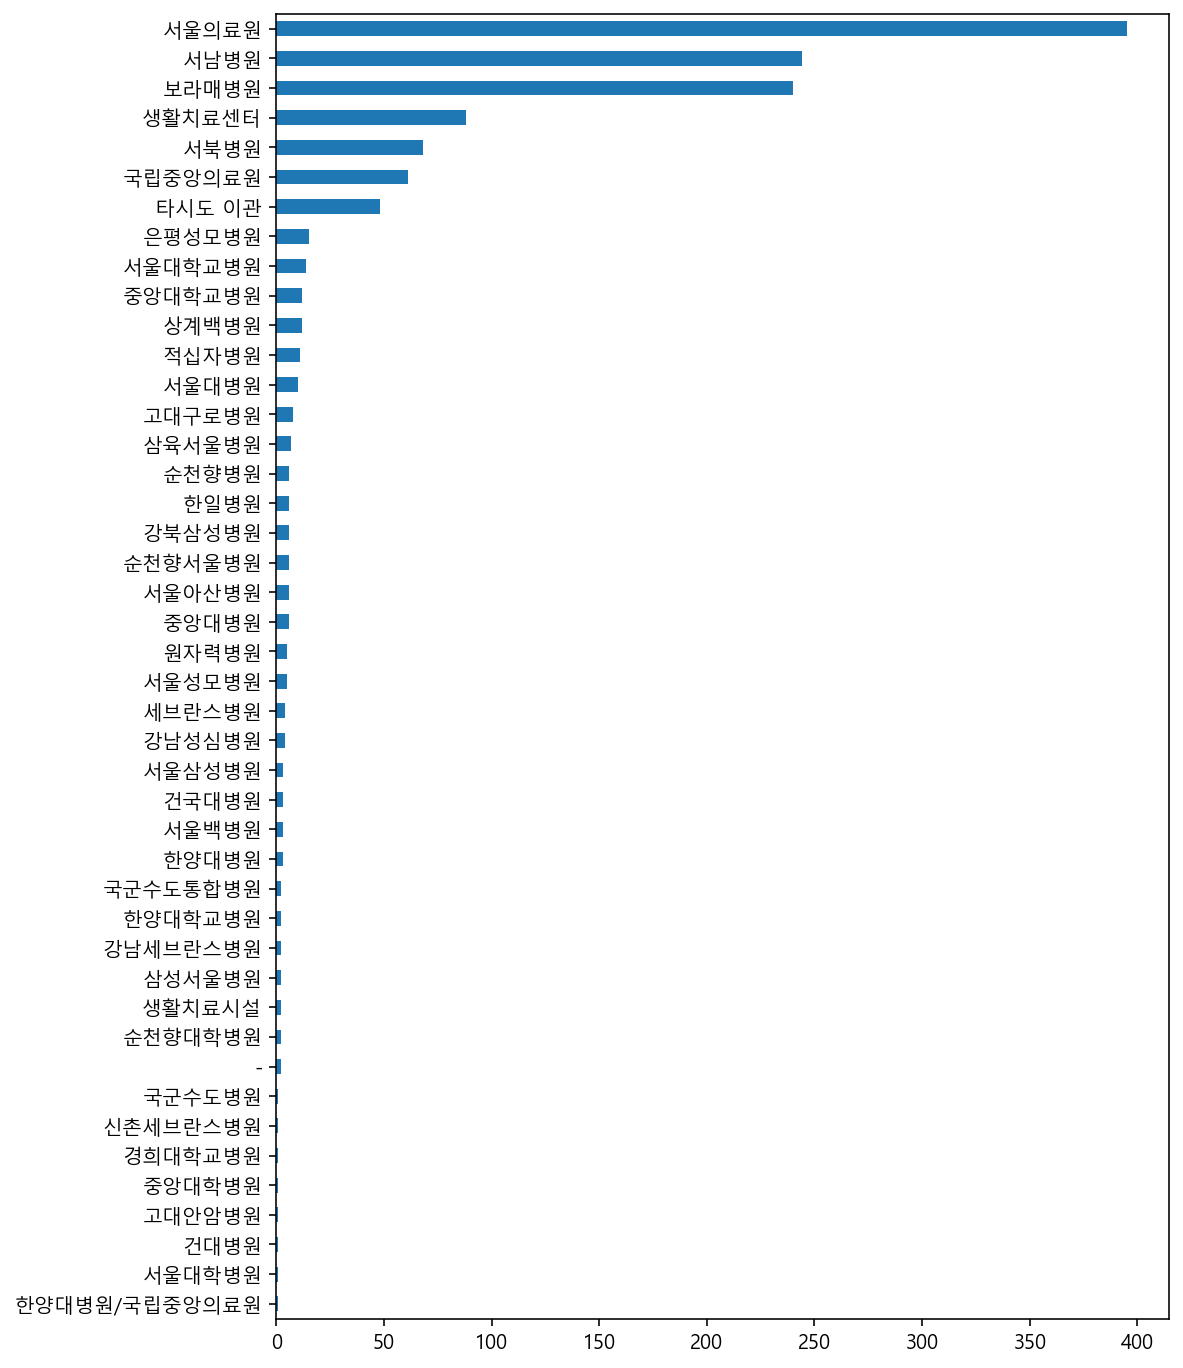

In [91]:
hospital_count.sort_values().plot.barh(figsize=(8, 12))

서울의료원으로 이송된 환자가 가장 많으며, 서남병원, 보라매병원이 그 뒤를 이어 많다!

In [92]:
# 상위 10개 병원
top_hospital_count = hospital_count.head(10)
top_hospital_index = top_hospital_count.index
top_hospital_index

Index(['서울의료원', '서남병원', '보라매병원', '생활치료센터', '서북병원', '국립중앙의료원', '타시도 이관',
       '은평성모병원', '서울대학교병원', '상계백병원'],
      dtype='object')

In [93]:
df.sample()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,지역,접촉번호,퇴원,사망,병원
277,1044,11938,6.10.,은평구,-,리치웨이 관련,서울의료원(퇴원),2020-06-10,6,24,06-10,은평구,,True,False,서울의료원


In [94]:
# 환자의 거주지와 병원 간의 입원 현황
hospital_gu =df.groupby(["지역", "병원"])["연번"].count().unstack()
hospital_gu

병원,-,강남성심병원,강남세브란스병원,강북삼성병원,건국대병원,건대병원,경희대학교병원,고대구로병원,고대안암병원,국군수도병원,...,은평성모병원,적십자병원,중앙대병원,중앙대학교병원,중앙대학병원,타시도 이관,한양대병원,한양대병원/국립중앙의료원,한양대학교병원,한일병원
지역,,,,,,,,,,,,,,,,,,,,,
강남구,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
강동구,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0
강북구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
강서구,NaN,1.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0
관악구,NaN,2.0,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN
광진구,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
구로구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
금천구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
노원구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## iloc로 일부 데이터만 보기

In [95]:
# 데이터가 많아서 환자의 거주지와 병원 간의 입원 현황을 8개만 확인
hospital_gu.iloc[:8, :8]

병원,-,강남성심병원,강남세브란스병원,강북삼성병원,건국대병원,건대병원,경희대학교병원,고대구로병원
지역,,,,,,,,
강남구,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
강동구,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
강북구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
강서구,NaN,1.0,NaN,2.0,1.0,NaN,NaN,NaN
관악구,NaN,2.0,NaN,2.0,NaN,NaN,NaN,2.0
광진구,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
구로구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
금천구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


대체로 환자가 거주하는 지역과 가까운 병원으로 입원을 한 것 같다. 데이터 수집 시점에는 아직 거주지 근처에 병상이 매우 부족한 현상은 없었던 것으로 판단 -> 실제로 서울시 병상 부족은 2020년 12월에 많이 발생하여 컨테이너 임시 병상을 마련했었다.

## loc로 일부 데이터만 보기
* iloc와 loc 차이 비교해보자

In [96]:
# .loc는 인덱스 번호가 아닌, 데이터를 넣어준다!
hospital_gu.loc[['강남구', '강서구'], ['강남성심병원', '서울의료원']]

병원,강남성심병원,서울의료원
지역,,
강남구,NaN,26.0
강서구,1.0,9.0


## pandas style 적용하기

In [97]:
hospital_gu_heatmap = hospital_gu.fillna(0).astype(int)

# top_hospital_index: 데이터가 많아서 확진자가 많이 입원한 상위 10개 병원만 고려
hospital_gu_heatmap[top_hospital_index].style.background_gradient()

병원,서울의료원,서남병원,보라매병원,생활치료센터,서북병원,국립중앙의료원,타시도 이관,은평성모병원,서울대학교병원,상계백병원
지역,,,,,,,,,,
강남구,26,7,21,6,2,4,0,0,0,1
강동구,23,2,0,0,1,4,0,0,0,0
강북구,11,5,2,1,0,1,0,0,0,1
강서구,9,26,14,4,7,2,0,4,1,0
관악구,21,24,41,9,4,3,0,1,0,0
광진구,9,1,2,0,1,1,0,0,1,0
구로구,16,23,25,1,3,12,0,0,0,0
금천구,1,15,13,0,0,1,0,1,0,0
노원구,29,1,3,0,4,1,0,0,0,5


In [98]:
# 행과 열을 Transpose해서 보자!
hospital_gu_heatmap[top_hospital_index].T.style.background_gradient()

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
병원,,,,,,,,,,,,,,,,,,,,,,,,,,
서울의료원,26,23,11,9,21,9,16,1,29,35,11,8,13,10,17,25,18,28,12,16,15,9,3,2,19,9
서남병원,7,2,5,26,24,1,23,15,1,8,5,12,13,6,7,4,2,6,33,25,2,10,3,1,1,2
보라매병원,21,0,2,14,41,2,25,13,3,3,8,24,3,3,13,6,2,2,14,8,6,10,4,3,3,7
생활치료센터,6,0,1,4,9,0,1,0,0,2,3,4,2,2,10,1,5,9,6,4,5,5,0,1,6,2
서북병원,2,1,0,7,4,1,3,0,4,2,4,2,1,6,4,3,0,2,2,2,2,10,0,1,3,2
국립중앙의료원,4,4,1,2,3,1,12,1,1,3,3,1,1,4,2,3,1,1,1,3,2,2,1,0,1,3
타시도 이관,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48
은평성모병원,0,0,0,4,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,4,1,0,0,1
서울대학교병원,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,8,1,0,0


* 서울의료원에 입원한 환자가 거주하는 지역이 서울 많은 지역에 분포하고 있으며, 다른 병원에 비해 환자수도 많다! -> 실제 서울의료원은 강북, 강남에 위치해있고, 이 두 곳의 환자수를 동시에 고려한 수치라고 판단이 된다. 또한, 서울시 산하 최대 규모 병원으로 추정됨
* 

# 여행력

In [99]:
df.sample()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,지역,접촉번호,퇴원,사망,병원
867,454,9833,3.31.,마포구,"미국, 브라질",해외 접촉 추정,서남병원(퇴원),2020-03-31,3,14,03-31,마포구,,True,False,서남병원


In [100]:
df["여행력"].unique()

array(['-', '독일', '미국', '키르기스스탄', '이라크', '아랍에미리트', '인도', '멕시코', '카자흐스탄',
       'UAE', '영국', '필리핀', '방글라데시', '일본', '파키스탄', '터키', '러시아', '아일랜드',
       '스페인', '프랑스', '콩코, 프랑스', '캐나다', '페루, 미국',
       '프랑스, 스페인, 독일, 이탈리아, 네덜란드', '팔라우', '호주, 인도네시아', '인도네시아', '이탈리아',
       '포르투칼', '브라질', '미국, 캐나다, 멕시코', '미국 뉴욕', '오스트리아', '미국, 브라질', '태국',
       '멕시코, 미국', '아르헨티나, 볼리비아, 브라질', '폴란드', '말레이시아', '필리핀, 마닐라',
       '브라질, 아르헨티아, 칠레, 볼리비아', '프랑스, 독일', '미국, 캐나다', '스페인, 카타르',
       '이탈리아, 프랑스', '체코, 헝가리, 오스트리아, 이탈리아, 프랑스', '모로코, 프랑스, 오스트리아',
       '영국, 프랑스', '스페인,체코', '독일,프랑스', '프랑스, 스페인', '스페인, 프랑스',
       '이탈리아, 독일, 홍콩', '중국 청도', '베트남', '우한교민', '중국 우한시', '싱가포르', '우한 교민'],
      dtype=object)

In [101]:
# 전처리를 위해 새로운 칼럼 "해외"를 만든다.
df["해외"] = df["여행력"]
df["해외"] = df["해외"].replace('-', np.nan) # '-'을 Nan으로 변경
df["해외"].nunique() # 결측치를 제외하고(default dropna=True) unique한 데이터 개수

58

In [102]:
df["해외"].value_counts().head(10)

미국      124
영국       45
필리핀      18
스페인      11
프랑스      10
태국        6
캐나다       5
멕시코       5
파키스탄      4
브라질       4
Name: 해외, dtype: int64

미국 여행력이 있는 환자가 가장 많음

## 여행력이 있는 데이터만 가져와서 서브셋 만들기

In [103]:
# "해외" 칼럼에 결측치가 없는 데이터만 가져와서 새로운 데이터프레임에 저장
df_oversea = df[df["해외"].notnull()].copy()
df_oversea.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,지역,접촉번호,퇴원,사망,병원,해외
15,1306,12779,6.29.,노원구,독일,해외 접촉 추정,서북병원,2020-06-29,6,27,06-29,노원구,,False,False,서북병원,독일
18,1303,12746,6.28.,서초구,미국,해외 접촉 추정,서북병원,2020-06-28,6,26,06-28,서초구,,False,False,서북병원,미국
28,1293,12684,6.27.,양천구,키르기스스탄,해외 접촉 추정,생활치료센터,2020-06-27,6,26,06-27,양천구,,False,False,생활치료센터,키르기스스탄
39,1282,12645,6.26.,중구,키르기스스탄,해외 접촉 추정,-,2020-06-26,6,26,06-26,중구,,False,False,-,키르기스스탄
41,1280,12642,6.26.,은평구,이라크,해외 접촉 추정,서북병원,2020-06-26,6,26,06-26,은평구,,False,False,서북병원,이라크


In [104]:
df_oversea["해외"].unique()

array(['독일', '미국', '키르기스스탄', '이라크', '아랍에미리트', '인도', '멕시코', '카자흐스탄', 'UAE',
       '영국', '필리핀', '방글라데시', '일본', '파키스탄', '터키', '러시아', '아일랜드', '스페인',
       '프랑스', '콩코, 프랑스', '캐나다', '페루, 미국', '프랑스, 스페인, 독일, 이탈리아, 네덜란드',
       '팔라우', '호주, 인도네시아', '인도네시아', '이탈리아', '포르투칼', '브라질', '미국, 캐나다, 멕시코',
       '미국 뉴욕', '오스트리아', '미국, 브라질', '태국', '멕시코, 미국', '아르헨티나, 볼리비아, 브라질',
       '폴란드', '말레이시아', '필리핀, 마닐라', '브라질, 아르헨티아, 칠레, 볼리비아', '프랑스, 독일',
       '미국, 캐나다', '스페인, 카타르', '이탈리아, 프랑스', '체코, 헝가리, 오스트리아, 이탈리아, 프랑스',
       '모로코, 프랑스, 오스트리아', '영국, 프랑스', '스페인,체코', '독일,프랑스', '프랑스, 스페인',
       '스페인, 프랑스', '이탈리아, 독일, 홍콩', '중국 청도', '베트남', '우한교민', '중국 우한시',
       '싱가포르', '우한 교민'], dtype=object)

위 셀 결과에서 단어 글자만 약간씩 다른 경우가 발생할 수도 있다. 데이터가 많으면, 하나씩 찾는 것이 어렵다. -> 이러한 경우에는 어떻게 찾아낼 수 있을까? -> CounterVectorizer? NLP? 

## 텍스트 데이터 다루기 
* https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#testing-for-strings-that-match-or-contain-a-pattern

* 나라 이름을 '유럽', '남미', '중국', 'UAE', '필리핀'으로 그룹핑

In [105]:
europe = "체코,헝가리,오스트리아,이탈리아,프랑스,모로코,독일,스페인,영국,폴란드,터키,아일랜드"
# .str.contains()에 구현 시, 'or'을 표현하기 위함
# -> 위 유럽 나라들을 한 개라도 포함하고 있는 데이터 추출
europe = europe.replace(",", "|")
europe

'체코|헝가리|오스트리아|이탈리아|프랑스|모로코|독일|스페인|영국|폴란드|터키|아일랜드'

In [106]:
df_oversea[df_oversea["해외"].str.contains(europe)]

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,지역,접촉번호,퇴원,사망,병원,해외
15,1306,12779,6.29.,노원구,독일,해외 접촉 추정,서북병원,2020-06-29,6,27,06-29,노원구,,False,False,서북병원,독일
428,893,11578,6.02.,강동구,영국,해외 접촉 추정,서울의료원(퇴원),2020-06-02,6,23,06-02,강동구,,True,False,서울의료원,영국
658,663,10871,5.09.,서초구,영국,해외 접촉 추정,서울의료원(퇴원),2020-05-09,5,19,05-09,서초구,,True,False,서울의료원,영국
684,637,10789,5.02.,강동구,터키,해외 접촉 추정,적십자병원(퇴원),2020-05-02,5,18,05-02,강동구,,True,False,적십자병원,터키
688,633,10750,4.27.,강남구,영국,해외 접촉 추정,적십자병원(퇴원),2020-04-27,4,18,04-27,강남구,,True,False,적십자병원,영국
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,191,7647,3.10.,은평구,"프랑스, 스페인",#6959 접촉(추정),서북병원(퇴원),2020-03-10,3,11,03-10,은평구,6959,True,False,서북병원,"프랑스, 스페인"
1205,116,6959,3.7.,은평구,"스페인, 프랑스",해외 접촉,서북병원(퇴원),2020-03-07,3,10,03-07,은평구,,True,False,서북병원,"스페인, 프랑스"
1218,103,5695,3.4.,동대문구,"이탈리아, 독일, 홍콩",해외 접촉,서북병원(퇴원),2020-03-04,3,10,03-04,동대문구,,True,False,서북병원,"이탈리아, 독일, 홍콩"
1236,85,3681,2.29.,강남구,이탈리아,해외 접촉,국립중앙의료원(퇴원),2020-02-29,2,9,02-29,강남구,,True,False,국립중앙의료원,이탈리아


In [107]:
# 남미 지역에 해당되는 국가명을 str.contains 로 검색하기 위한 형태로 만듭니다.
south_america = "브라질, 아르헨티아, 칠레, 볼리비아, 멕시코, 페루"
south_america = south_america.replace(", ", "|")
south_america

'브라질|아르헨티아|칠레|볼리비아|멕시코|페루'

In [108]:
# 유럽, 남미, 중국, UAE, 필리핀, 미국으로 그룹핑

df_oversea.loc[df_oversea["해외"].str.contains(europe), "해외"] = '유럽'
df_oversea.loc[df_oversea["해외"].str.contains(south_america), "해외"] = '남미'
df_oversea.loc[df_oversea["해외"].str.contains('중국|우한'), "해외"] = '중국'
df_oversea.loc[df_oversea["해외"].str.contains('아랍에미레이트'), "해외"] = 'UAE'
df_oversea.loc[df_oversea["해외"].str.contains('필리핀'), "해외"] = '필리핀'
df_oversea.loc[df_oversea["해외"].str.contains('미국'), "해외"] = '미국'
df_oversea["해외"].value_counts()

미국           126
유럽            94
필리핀           20
남미            15
중국             7
태국             6
캐나다            5
파키스탄           4
일본             4
인도             3
UAE            3
아랍에미리트         2
키르기스스탄         2
팔라우            2
이라크            2
인도네시아          2
카자흐스탄          2
호주, 인도네시아      1
포르투칼           1
방글라데시          1
베트남            1
말레이시아          1
러시아            1
싱가포르           1
Name: 해외, dtype: int64

근데 여기서 해외 칼럼에 '유럽과 남미' 이런식으로 중복된 경우에는 어떻게 처리하는게 맞는 것인가? 

In [109]:
df_oversea.sample()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,지역,접촉번호,퇴원,사망,병원,해외
1309,12,24,2.7.,아산시,우한교민,해외 접촉,국립중앙의료원(퇴원),2020-02-07,2,6,02-07,타지역,,True,False,국립중앙의료원,중국


In [111]:
day_oversea = df_oversea.groupby(["확진일자", "해외"])["연번"].count()
day_oversea

확진일자        해외    
2020-01-24  중국        1
2020-01-30  중국        2
2020-02-02  중국        1
2020-02-05  싱가포르      1
2020-02-06  중국        1
                     ..
2020-06-26  이라크       1
            키르기스스탄    1
2020-06-27  키르기스스탄    1
2020-06-28  미국        1
2020-06-29  유럽        1
Name: 연번, Length: 163, dtype: int64

In [112]:
# 나라별 누적 확진자 계산 -> df.groupby(level=)
day_oversea = day_oversea.groupby(level=[1]).cumsum()
day_oversea

확진일자        해외    
2020-01-24  중국          1
2020-01-30  중국          3
2020-02-02  중국          4
2020-02-05  싱가포르        1
2020-02-06  중국          5
                     ... 
2020-06-26  이라크         2
            키르기스스탄      1
2020-06-27  키르기스스탄      2
2020-06-28  미국        126
2020-06-29  유럽         94
Name: 연번, Length: 163, dtype: int64

In [114]:
day_oversea = day_oversea.reset_index()
day_oversea = day_oversea.rename(columns={"연번": '누적확진수'})
day_oversea.head()

,확진일자,해외,누적확진수
0,2020-01-24,중국,1
1,2020-01-30,중국,3
2,2020-02-02,중국,4
3,2020-02-05,싱가포르,1
4,2020-02-06,중국,5


In [115]:
day_oversea["해외"].value_counts()

미국           51
유럽           39
필리핀          16
남미           12
중국            6
캐나다           5
태국            4
일본            4
UAE           3
인도            3
카자흐스탄         2
아랍에미리트        2
이라크           2
팔라우           2
키르기스스탄        2
인도네시아         2
러시아           1
포르투칼          1
싱가포르          1
베트남           1
방글라데시         1
말레이시아         1
호주, 인도네시아     1
파키스탄          1
Name: 해외, dtype: int64

## 전체 확진수와 해외유입 확진수 비교

## merge를 통해 전체 확진수와 해외유입 확진수 비교하기

## 해외유입 확진자 중 퇴원 여부

## 월별 해외 확진자 수

## 구와 월별 해외 확진자 수

### crosstab으로 빈도수 구하기

### pivot_table로 빈도수 구하기

## 해외유입이 많은 지역(구)

## 구별 해외유입 국가 분석하기

### pivot table로 구하기

### 일부 구만 따로 보기

## 최근 데이터를 불러와 실습해 보기